##**Background and Motivation**##
There are multiple heart diseases and conditions that can affect the heart, and there are multiple reasons to cause a heart disease if people didn't follow a healthy lifestyle. Heart diseases have so many risk factors, and can lead to mortality. Detecting a heart disease at an early stage is crucial and can be really effective in the teatment process.  

##Dataset##

The dataset used describe some medical information for 918 patients that have chest pain and more than half of them has a heart disease. Medical Information includes chest pain type ,Resting Blood Pressure ,serum cholesterol level. The dataset also includes a column that states whether the patient has a heart disease.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

In [ ]:
#Importing seed
# np.random.seed(24)
import random
random.seed(10)

In [ ]:
#Uploading Dataset
heartFailureFilePath = 'heart.csv'
df = pd.read_csv(heartFailureFilePath)

In [ ]:
# Dataset first 5 rows
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
# Dataset Features
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Dataset Size
len(df)

918

In [ ]:
# Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Descriptive Statistics of the Dataset
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
#Number of samples in our dataset that have heart disease
x=df['HeartDisease'].value_counts()[1]
print("Number of samples in our dataset that have heart disease is",x)

Number of samples in our dataset that have heart disease is 508


In [ ]:
FastingBS=df['FastingBS'].value_counts()
FastingBS

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
sex=df['Sex'].value_counts()
sex

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
ChestPainType=df.ChestPainType.value_counts()
ChestPainType

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
RestingECG=df.RestingECG.value_counts()
RestingECG

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
ExerciseAngina=df.ExerciseAngina.value_counts()
ExerciseAngina

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
ST_Slope=df.ST_Slope.value_counts()
ST_Slope

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
HeartDisease=df.HeartDisease.value_counts()
HeartDisease

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
#Skewness of data
df.skew()

<ipython-input-17-c4eddaadabca>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

### Data Visualization ###


<Axes: >

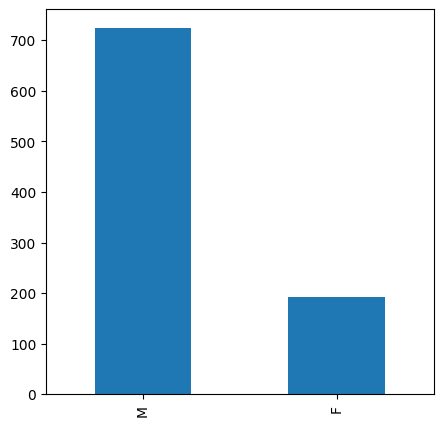

In [ ]:
#Histograms
#features_to_plot1 = ['Sex'], 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
sex.plot.bar(figsize=(5,5))



<Axes: >

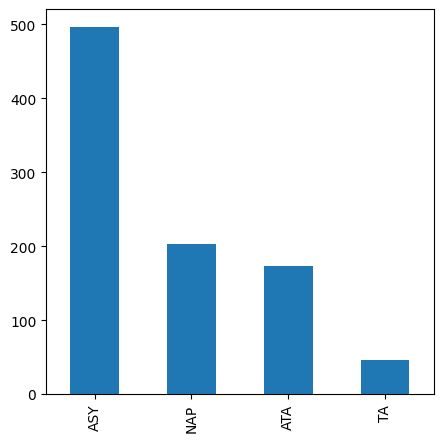

In [ ]:
ChestPainType.plot.bar(figsize=(5,5))

<Axes: >

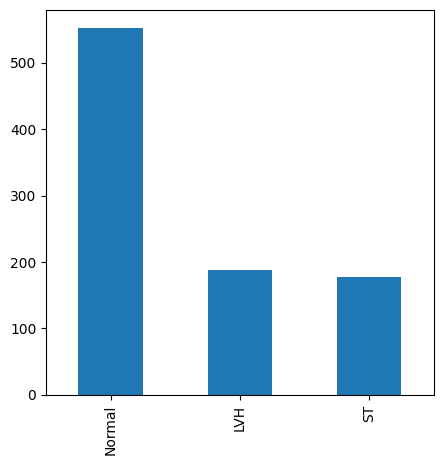

In [ ]:
RestingECG.plot.bar(figsize=(5,5))

<Axes: >

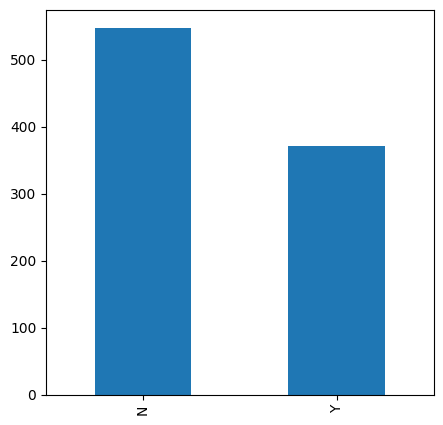

In [ ]:
ExerciseAngina.plot.bar(figsize=(5,5))

<Axes: >

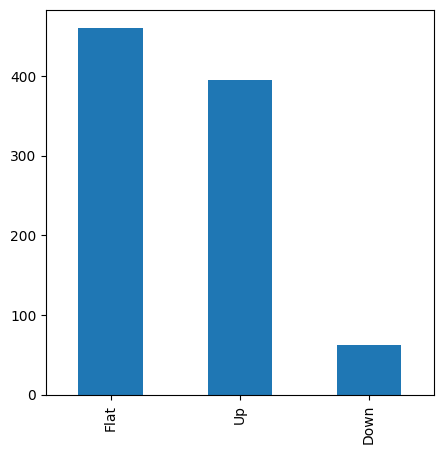

In [ ]:
ST_Slope.plot.bar(figsize=(5,5))

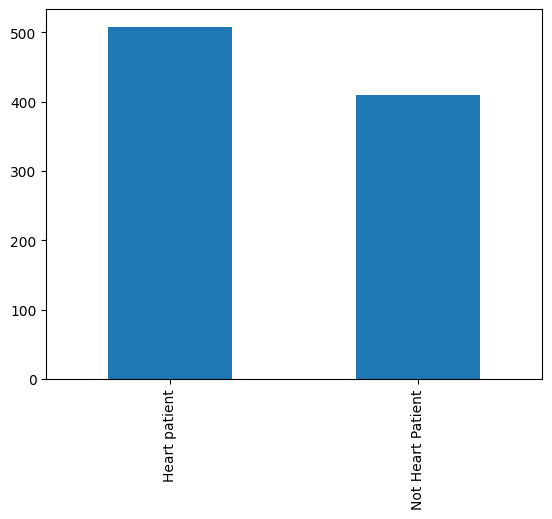

In [ ]:
# Create the bar plot
ax = HeartDisease.plot(x='HeartDisease', y='Count', kind='bar')

# Customize the x-axis labels
labels = ['Heart patient', 'Not Heart Patient']
ax.set_xticklabels(labels)

# Display the plot
plt.show()



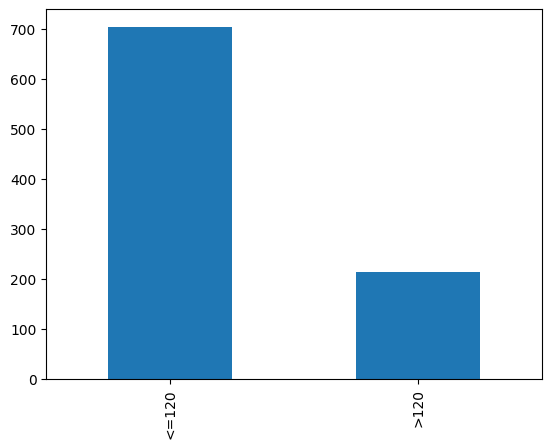

In [ ]:
# Create the bar plot
ax = FastingBS.plot(x='FastingBS', y='Count', kind='bar')

# Customize the x-axis labels
labels = ['<=120', '>120']
ax.set_xticklabels(labels)

# Display the plot
plt.show()


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>]], dtype=object)

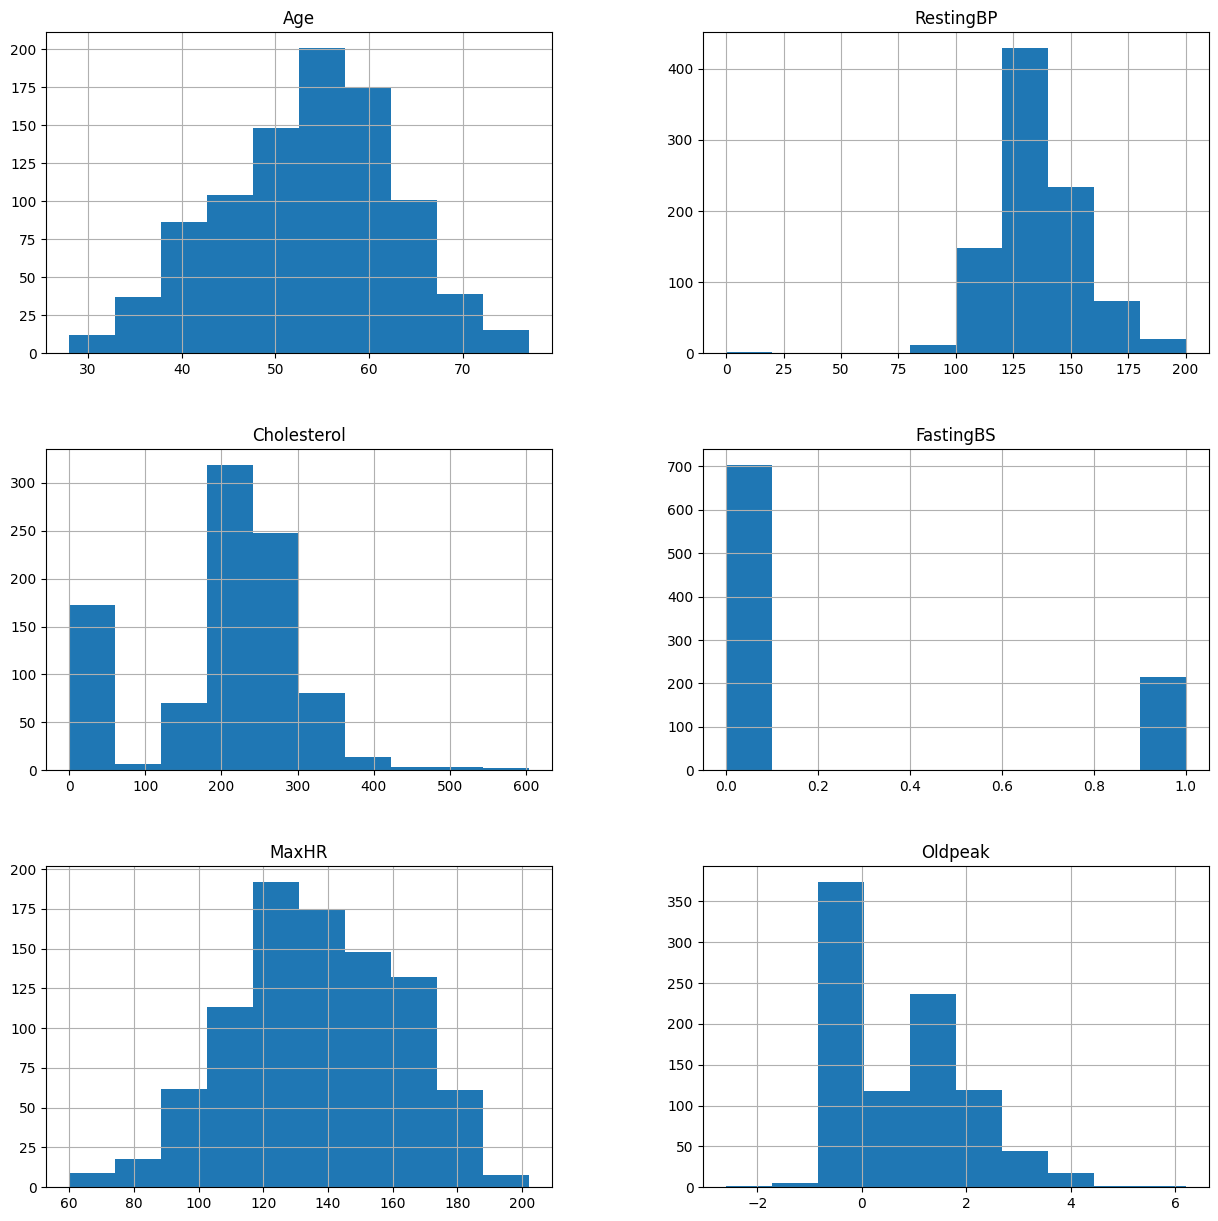

In [ ]:
features_to_plot = ['Age', 'RestingBP', 'Cholesterol','FastingBS','MaxHR','Oldpeak']
df[features_to_plot].hist(figsize=(15,15))

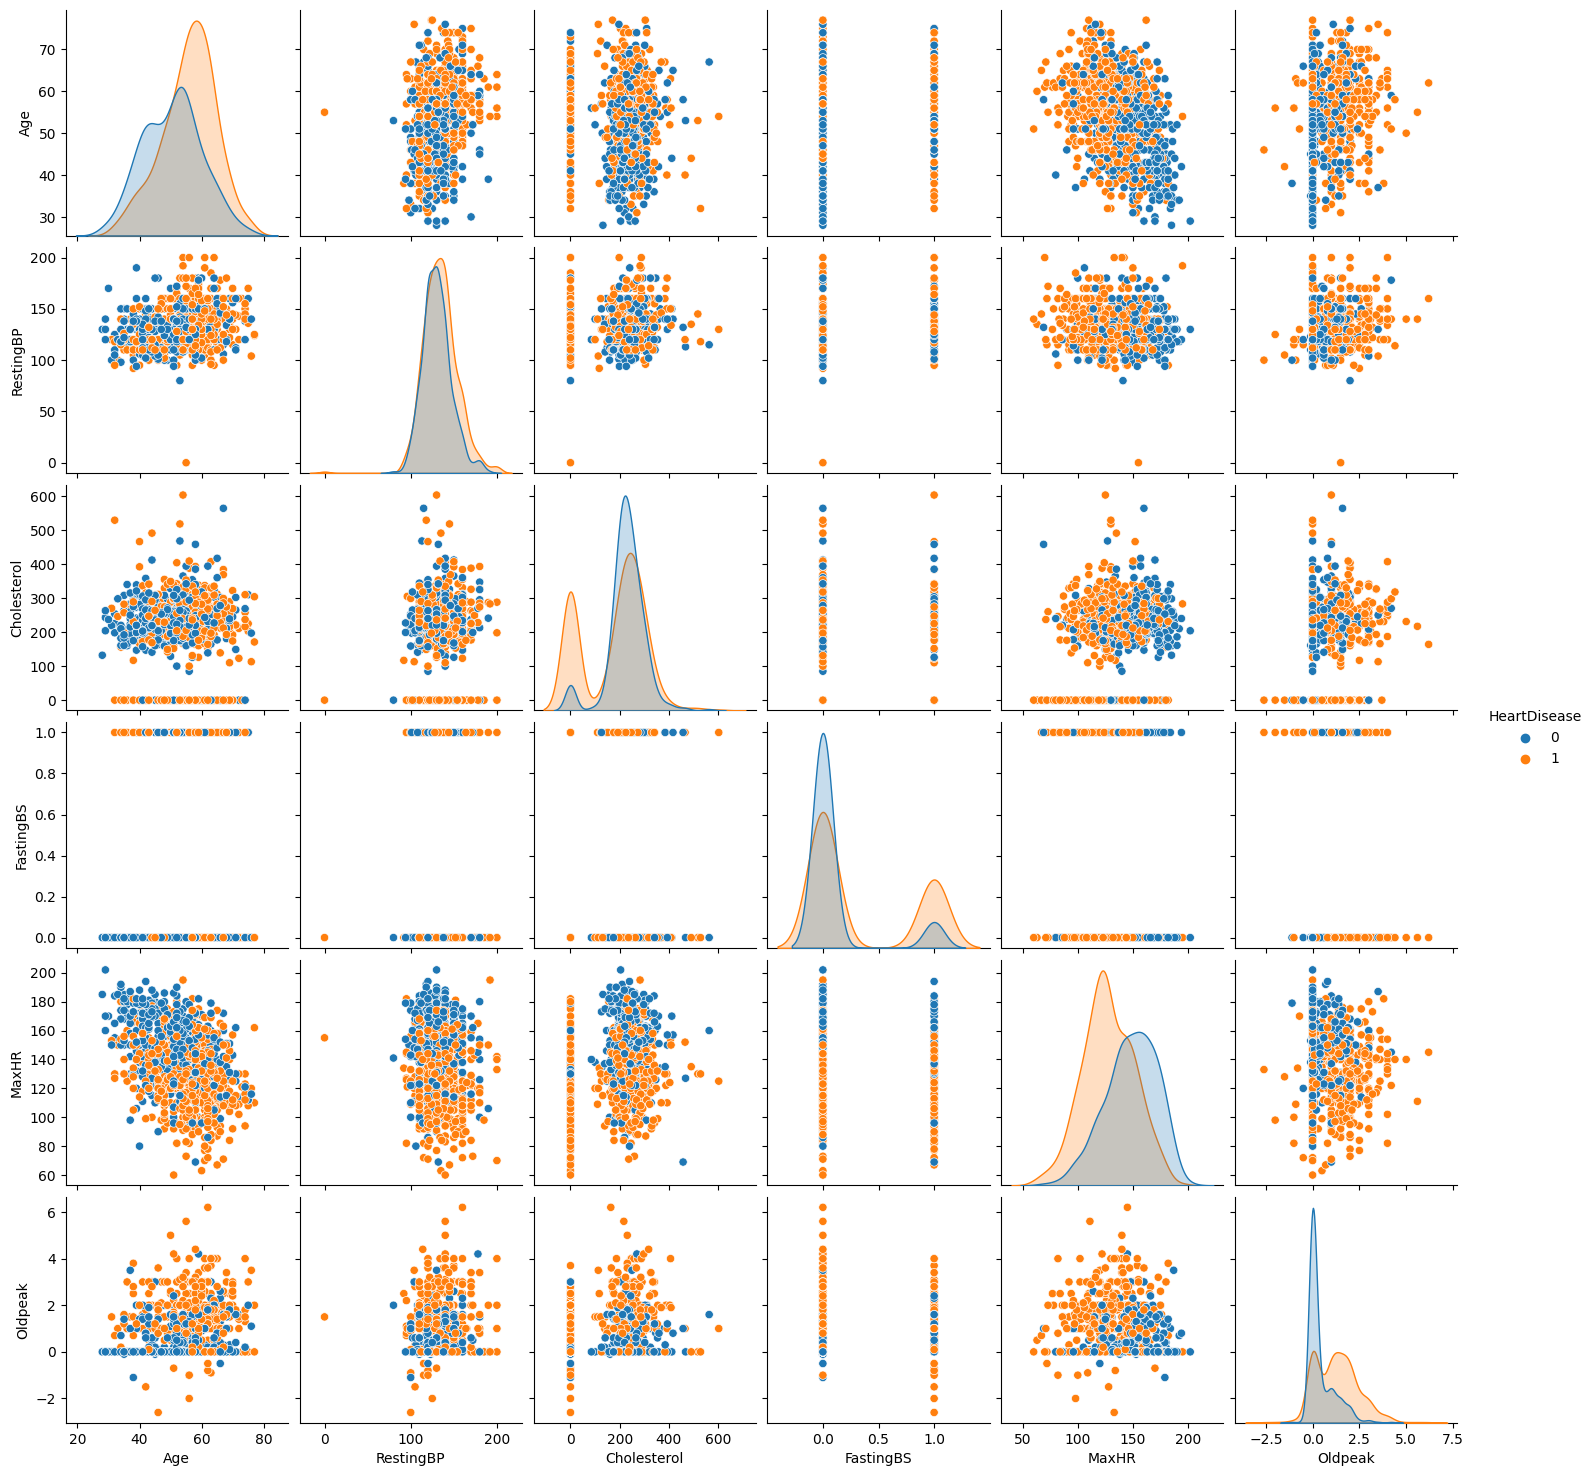

In [ ]:
sns.pairplot(df, hue='HeartDisease')
plt.show()

Age                Axes(0.125,0.747241;0.227941x0.132759)
RestingBP       Axes(0.398529,0.747241;0.227941x0.132759)
Cholesterol     Axes(0.672059,0.747241;0.227941x0.132759)
FastingBS          Axes(0.125,0.587931;0.227941x0.132759)
MaxHR           Axes(0.398529,0.587931;0.227941x0.132759)
Oldpeak         Axes(0.672059,0.587931;0.227941x0.132759)
HeartDisease       Axes(0.125,0.428621;0.227941x0.132759)
dtype: object

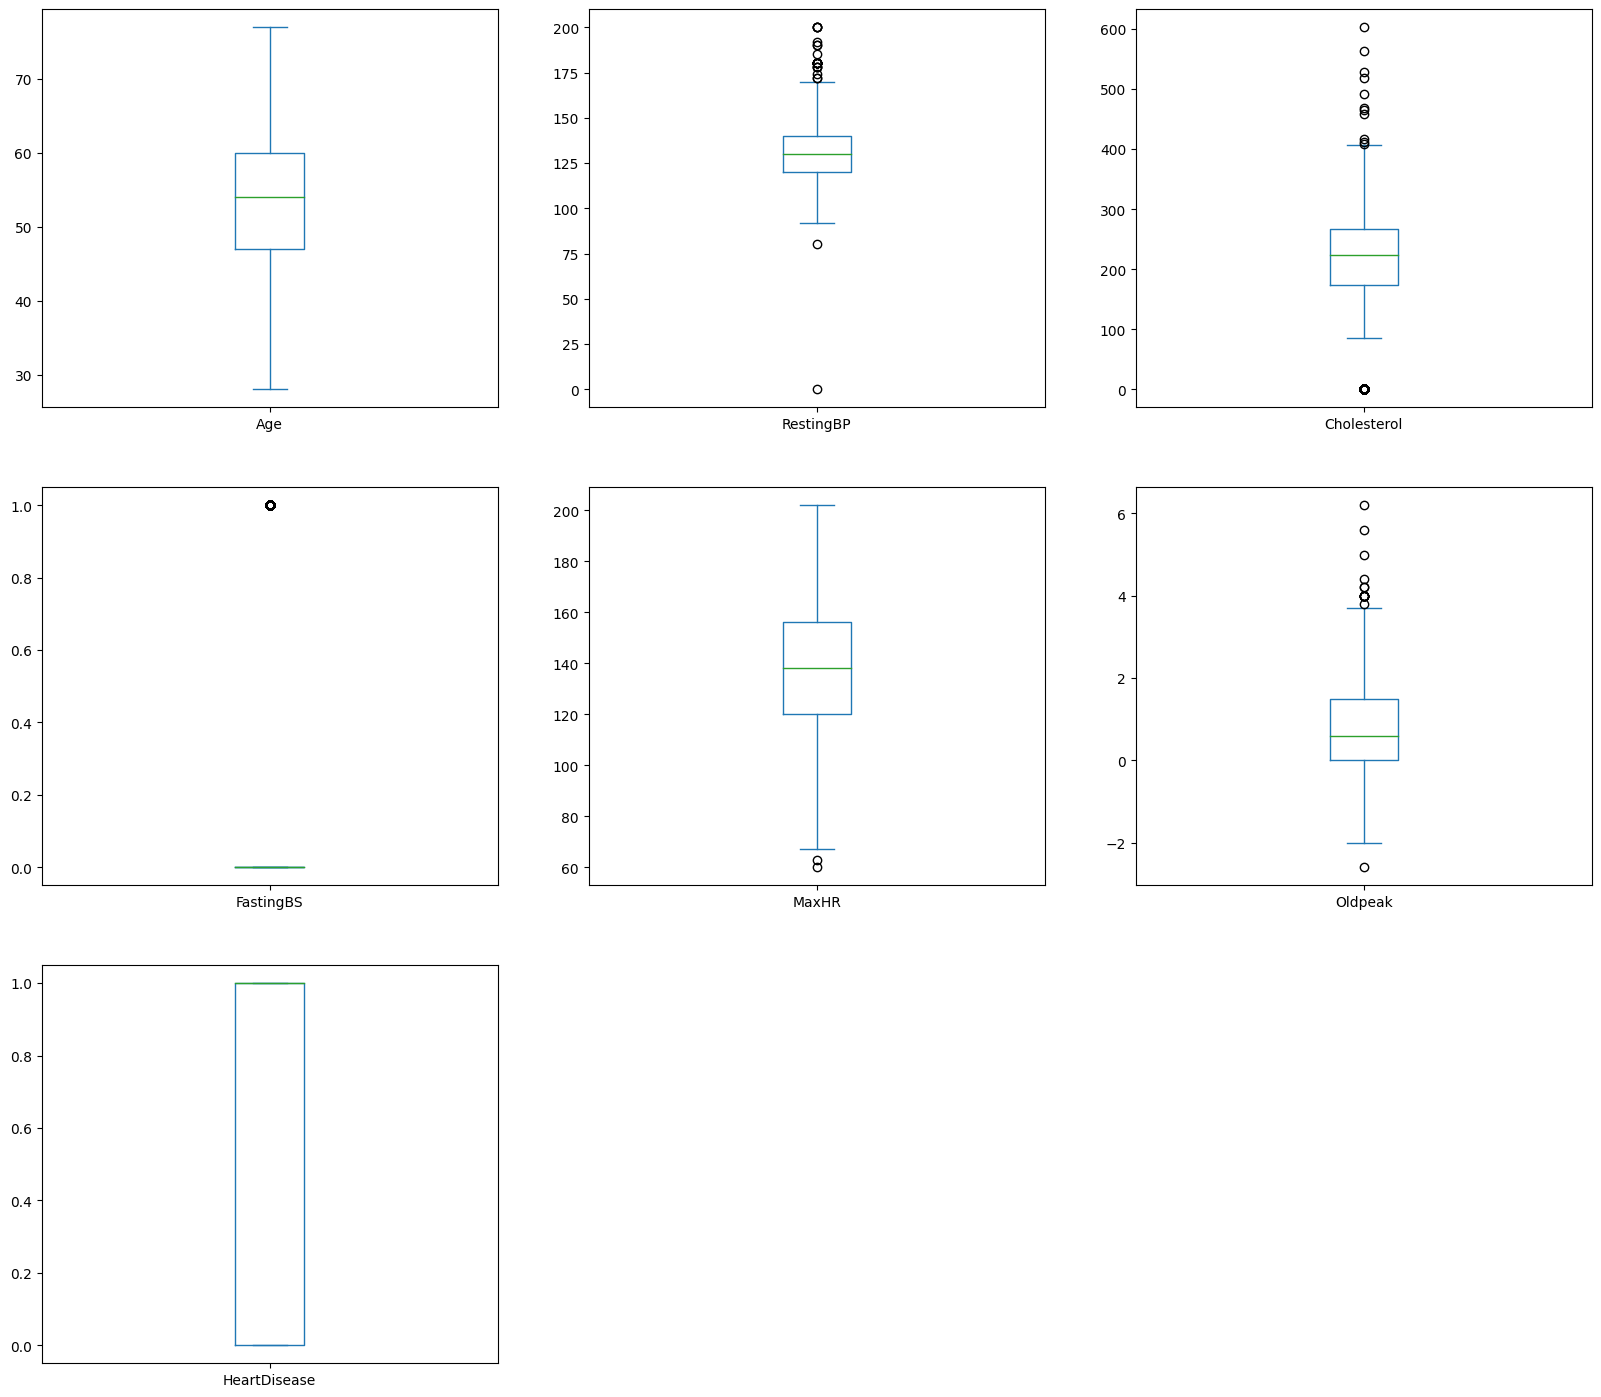

In [ ]:
#Box Plots
df.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(20,30))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

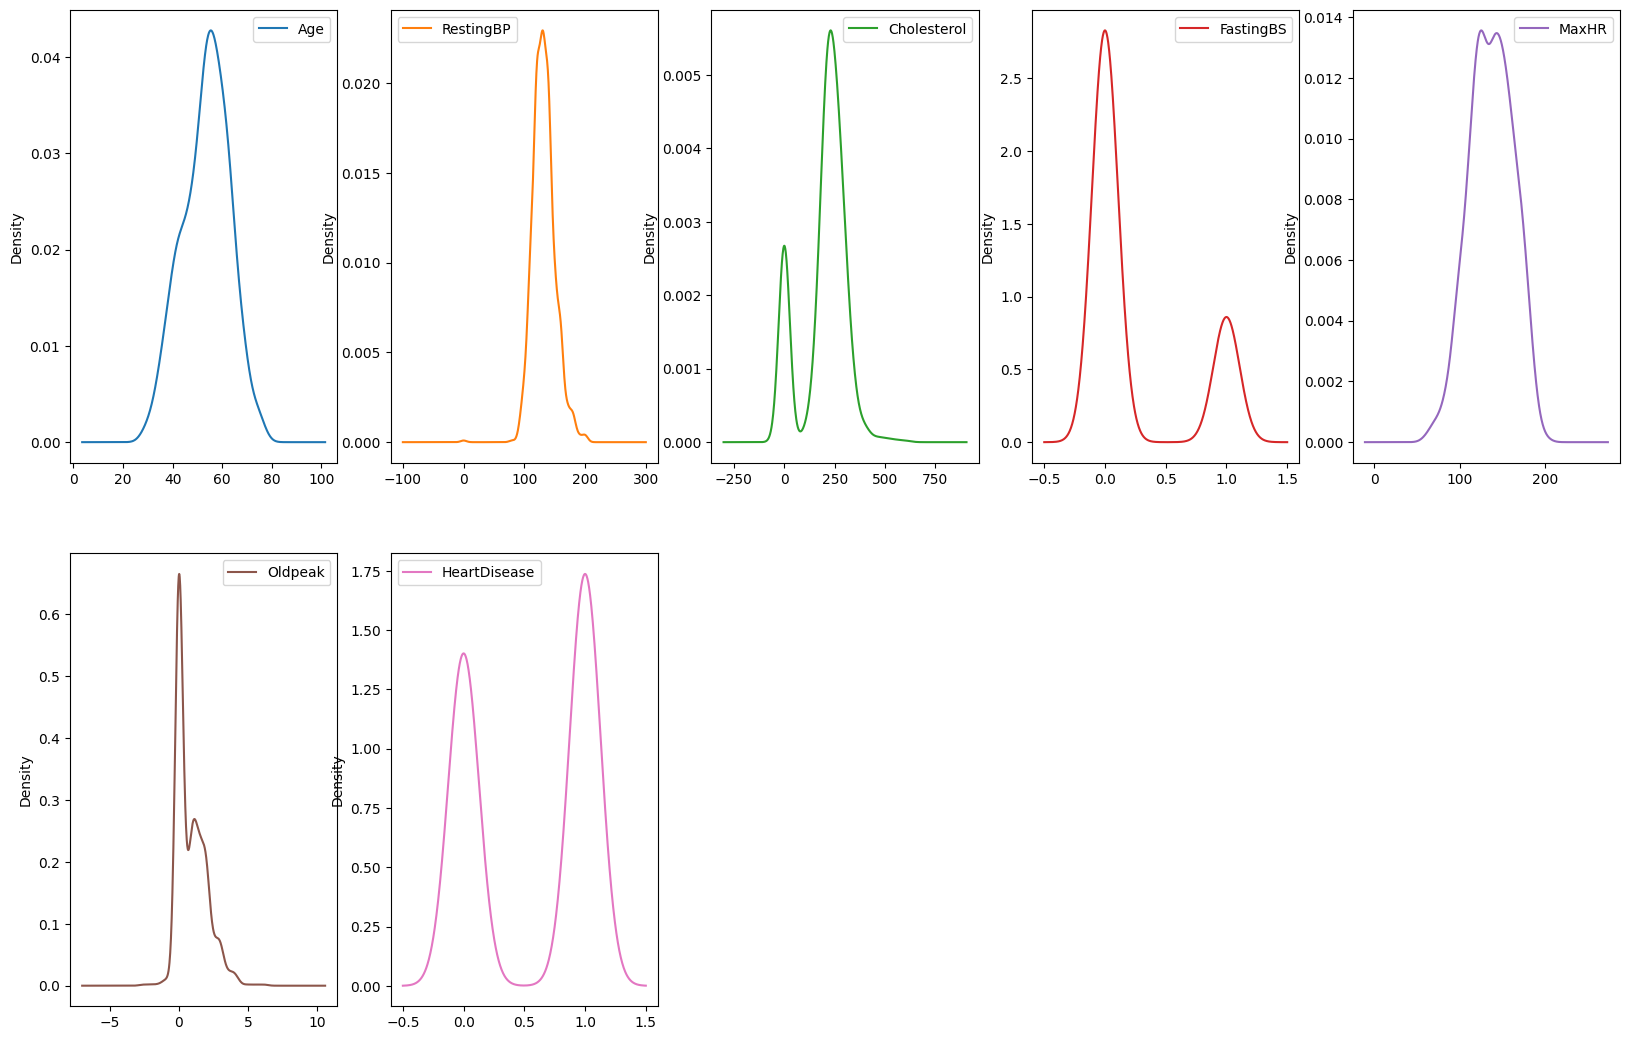

In [ ]:
#Density plots
df.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(20,20))

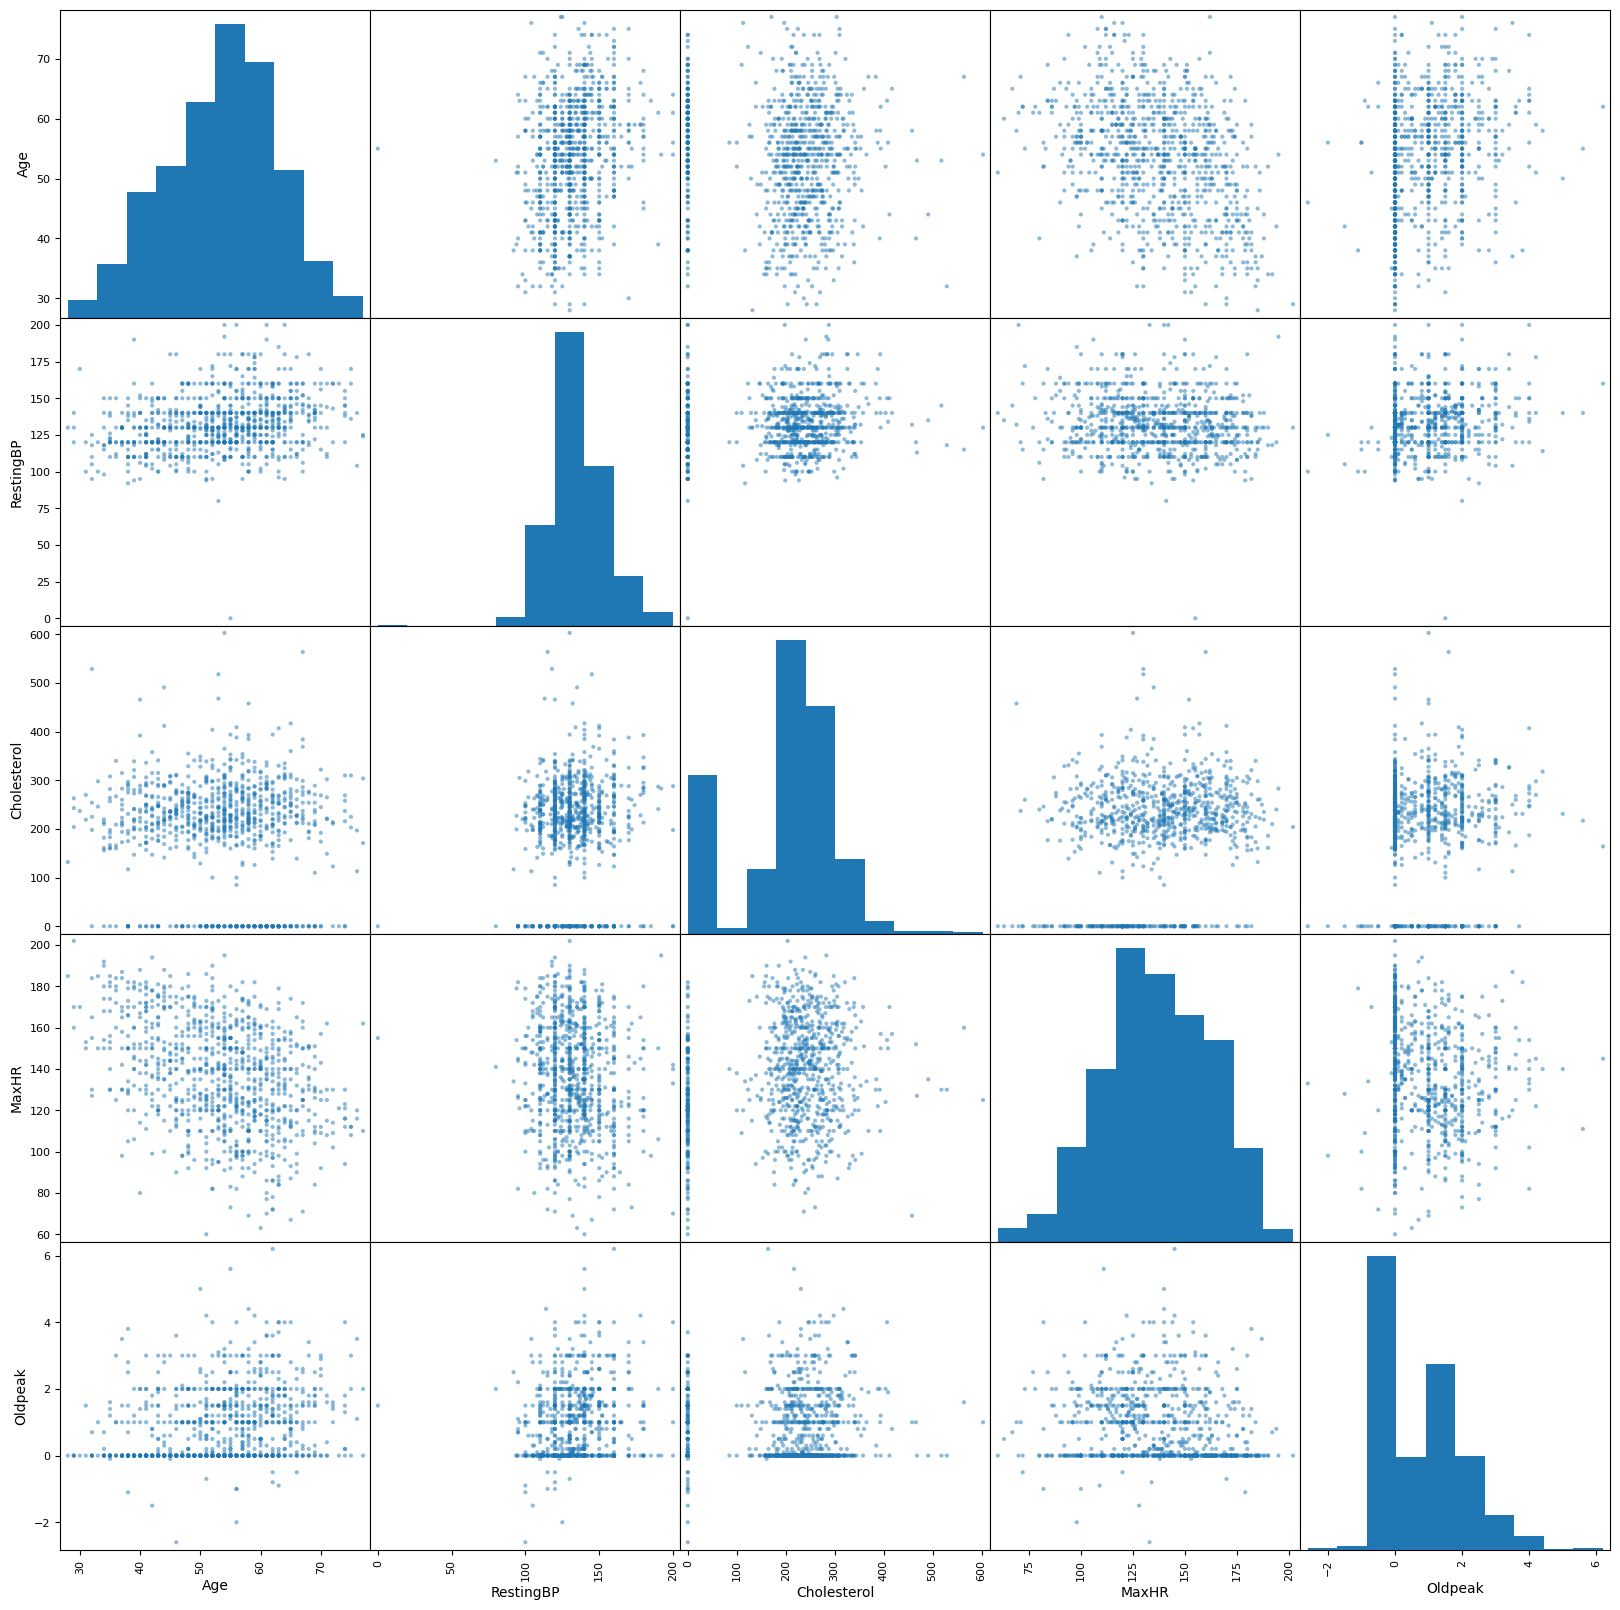

In [ ]:
#Scatter Plot
from pandas.plotting import scatter_matrix
numerical_data= ['Age', 'RestingBP', 'Cholesterol','MaxHR','Oldpeak']
numerical_data_data_frame=df[numerical_data]

scatter_matrix(numerical_data_data_frame, figsize=(20,20))
plt.show()

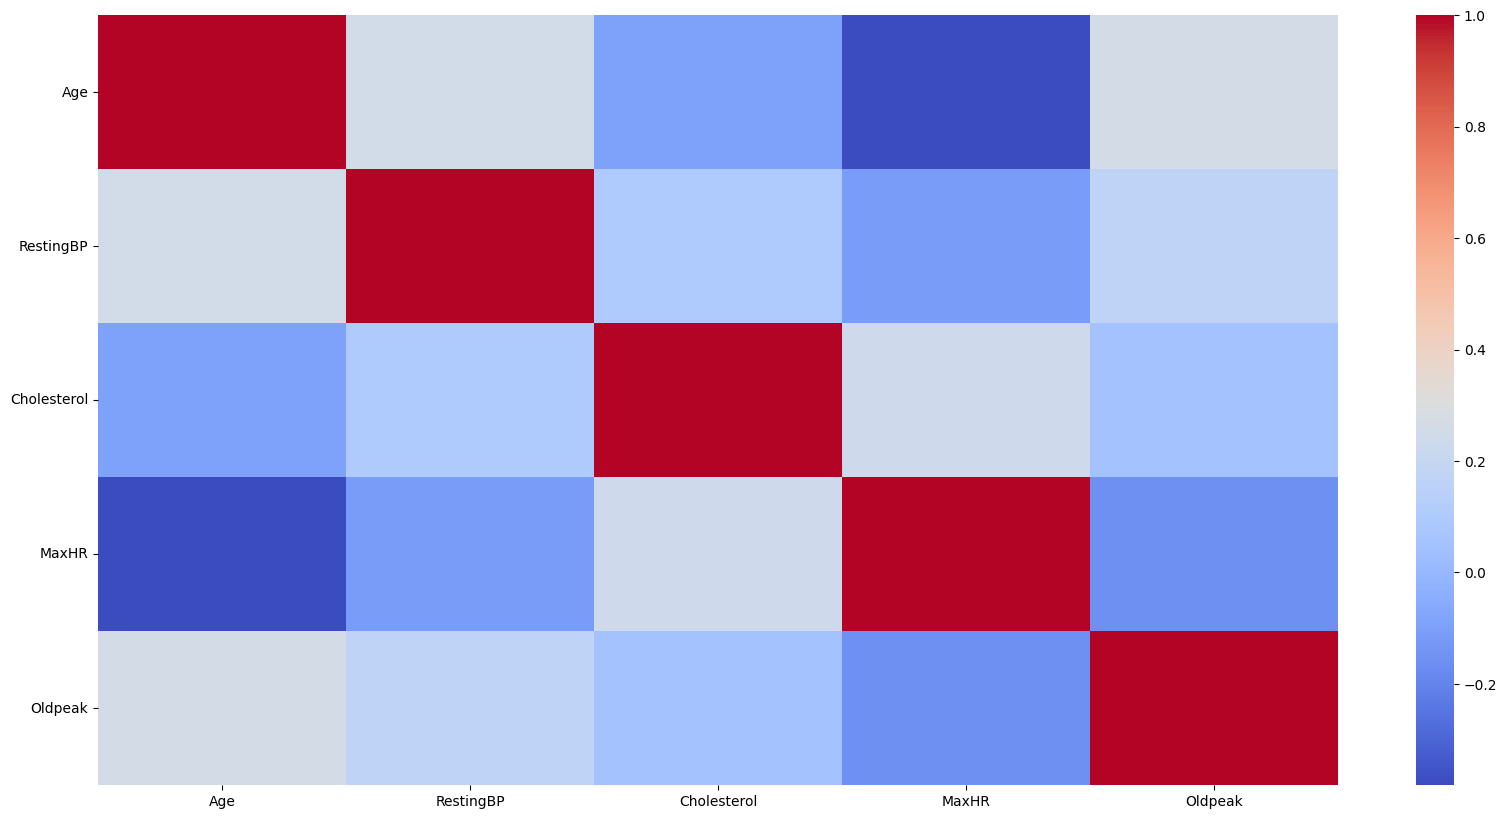

In [ ]:
features_corr=numerical_data_data_frame.corr();
features_corr

from pandas.plotting import scatter_matrix
import seaborn as sns

sns.heatmap(features_corr, cmap='coolwarm').figure.set_size_inches(20, 10)

plt.show()

#scatter_matrix(df, figsize=(20, 20))

plt.show()

##**Goal**##
Our goal is to classify patients according to their medical information to decide whether they have a heart disease or not.


##Methodology##


###Data cleaning and preprocessing:

In [ ]:
# transforming categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder

# creating one-hot encoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# encoding categorical data into one-hot vectors
encoded_data = encoder.fit_transform(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

# getting feature names
feature_names = encoder.get_feature_names_out(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']) #EX:Sex_F ,Sex_M

# converting the one-hot vectors into dataframe
df_encoded = pd.DataFrame(encoded_data, columns=feature_names)

# dropping the original categorical columns
df = df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)

# concatenating the encoded features dataframe with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df = df.drop(['Sex_M', 'ChestPainType_ASY', 'RestingECG_LVH', 'ExerciseAngina_N', 'ST_Slope_Flat'], axis=1)
df

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      0.0                1.0                0.0               0.0   
1      1.0                0.0                1.0               0.0   
2      0.0                1.0                0.0               0.0   
3      1.0                0.0                0.0               0.0   
4      0.0                0.0                1.0               0.0   
..     ...                ...                ...               ...   
913    0.0                0.0                0.0               1.0   
914    0.0                0.0                0.0               0.0   
915    0.0                0.0                0.0               0.0   
916    1.0                1.0                0.0               0.0   
917    0.0                0.0                1.0               0.0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Down  \
0                  1.0            0.0               0.0            0.0   
1                  1.0            0.0               0.0            0.0   
2                  0.0            1.0               0.0            0.0   
3                  1.0            0.0               1.0            0.0   
4                  1.0            0.0               0.0            0.0   
..                 ...            ...               ...            ...   
913                1.0            0.0               0.0            0.0   
914                1.0            0.0               0.0            0.0   
915                1.0            0.0               1.0            0.0   
916                0.0            0.0               0.0            0.0   
917                1.0            0.0               0.0            0.0   

     ST_Slope_Up  
0            1.0  
1            0.0  
2            1.0  
3            0.0  
4            1.0  
..           ...  
913          0.0  
914          0.0  
915          0.0  
916          0.0  
917          1.0  

[918 rows x 16 columns]

####Standardizing and Normalizing Data

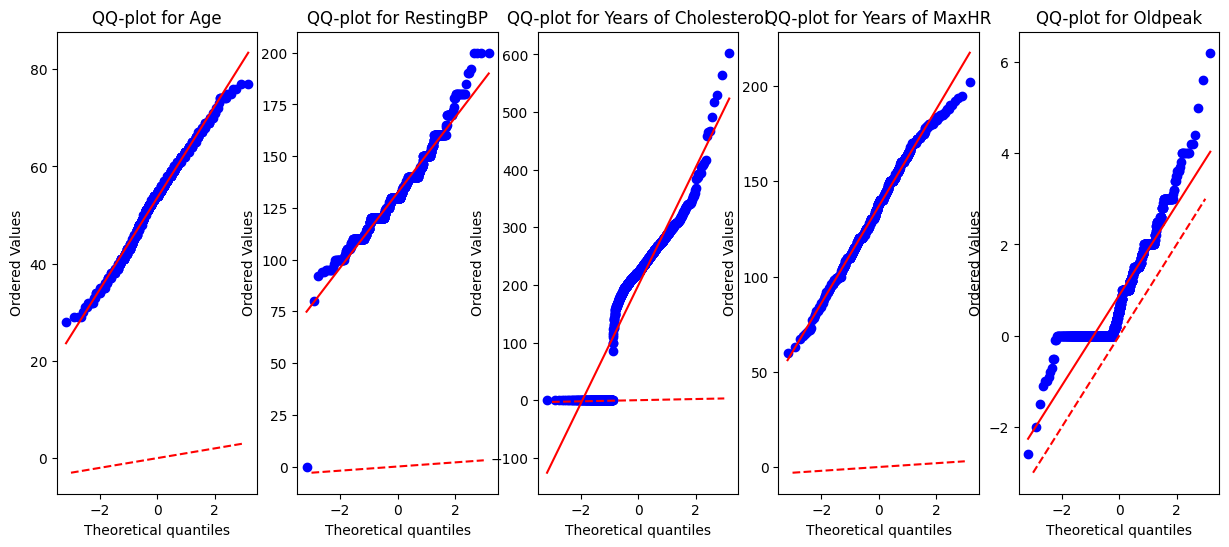

In [ ]:
#Plot QQ plot to check normal distribution
fig, axs = plt.subplots(1, 5, figsize=(15, 6))


stats.probplot(df['Age'], plot=axs[0])
axs[0].set_title('QQ-plot for Age')
axs[0].plot([-3, 3], [-3, 3], color='r', linestyle='--')


stats.probplot(df['RestingBP'], plot=axs[1])
axs[1].set_title('QQ-plot for RestingBP')
axs[1].plot([-3, 3], [-3, 3], color='r', linestyle='--')


stats.probplot(df['Cholesterol'], plot=axs[2])
axs[2].set_title('QQ-plot for Years of Cholesterol')
axs[2].plot([-3, 3], [-3, 3], color='r', linestyle='--')


stats.probplot(df['MaxHR'], plot=axs[3])
axs[3].set_title('QQ-plot for Years of MaxHR')
axs[3].plot([-3, 3], [-3, 3], color='r', linestyle='--')

stats.probplot(df['Oldpeak'], plot=axs[4])
axs[4].set_title('QQ-plot for Oldpeak')
axs[4].plot([-3, 3], [-3, 3], color='r', linestyle='--')




plt.show()
#df.drop(['Age_standardized', 'RestingBP_standardized', 'Cholesterol_standardized','MaxHR_standardized'], axis=1, inplace=True)

We can see that almost the age follow normal distribution

In [ ]:
#Standardizing the age

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = pd.DataFrame(scaler.fit_transform(df[['Age']]))
df



Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0   -1.433140        140          289          0    172      0.0   
1   -0.478484        160          180          0    156      1.0   
2   -1.751359        130          283          0     98      0.0   
3   -0.584556        138          214          0    108      1.5   
4    0.051881        150          195          0    122      0.0   
..        ...        ...          ...        ...    ...      ...   
913 -0.902775        110          264          0    132      1.2   
914  1.536902        144          193          1    141      3.4   
915  0.370100        130          131          0    115      1.2   
916  0.370100        130          236          0    174      0.0   
917 -1.645286        138          175          0    173      0.0   

     HeartDisease  Sex_F  ChestPainType_ATA  ChestPainType_NAP  \
0               0    0.0                1.0                0.0   
1               1    1.0                0.0                1.0   
2               0    0.0                1.0                0.0   
3               1    1.0                0.0                0.0   
4               0    0.0                0.0                1.0   
..            ...    ...                ...                ...   
913             1    0.0                0.0                0.0   
914             1    0.0                0.0                0.0   
915             1    0.0                0.0                0.0   
916             1    1.0                1.0                0.0   
917             0    0.0                0.0                1.0   

     ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0                 0.0                1.0            0.0               0.0   
1                 0.0                1.0            0.0               0.0   
2                 0.0                0.0            1.0               0.0   
3                 0.0                1.0            0.0               1.0   
4                 0.0                1.0            0.0               0.0   
..                ...                ...            ...               ...   
913               1.0                1.0            0.0               0.0   
914               0.0                1.0            0.0               0.0   
915               0.0                1.0            0.0               1.0   
916               0.0                0.0            0.0               0.0   
917               0.0                1.0            0.0               0.0   

     ST_Slope_Down  ST_Slope_Up  
0              0.0          1.0  
1              0.0          0.0  
2              0.0          1.0  
3              0.0          0.0  
4              0.0          1.0  
..             ...          ...  
913            0.0          0.0  
914            0.0          0.0  
915            0.0          0.0  
916            0.0          0.0  
917            0.0          1.0  

[918 rows x 16 columns]

In [ ]:
#we checked for duplicates but there is none
x=df.drop_duplicates()
x

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0   -1.433140        140          289          0    172      0.0   
1   -0.478484        160          180          0    156      1.0   
2   -1.751359        130          283          0     98      0.0   
3   -0.584556        138          214          0    108      1.5   
4    0.051881        150          195          0    122      0.0   
..        ...        ...          ...        ...    ...      ...   
913 -0.902775        110          264          0    132      1.2   
914  1.536902        144          193          1    141      3.4   
915  0.370100        130          131          0    115      1.2   
916  0.370100        130          236          0    174      0.0   
917 -1.645286        138          175          0    173      0.0   

     HeartDisease  Sex_F  ChestPainType_ATA  ChestPainType_NAP  \
0               0    0.0                1.0                0.0   
1               1    1.0                0.0                1.0   
2               0    0.0                1.0                0.0   
3               1    1.0                0.0                0.0   
4               0    0.0                0.0                1.0   
..            ...    ...                ...                ...   
913             1    0.0                0.0                0.0   
914             1    0.0                0.0                0.0   
915             1    0.0                0.0                0.0   
916             1    1.0                1.0                0.0   
917             0    0.0                0.0                1.0   

     ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0                 0.0                1.0            0.0               0.0   
1                 0.0                1.0            0.0               0.0   
2                 0.0                0.0            1.0               0.0   
3                 0.0                1.0            0.0               1.0   
4                 0.0                1.0            0.0               0.0   
..                ...                ...            ...               ...   
913               1.0                1.0            0.0               0.0   
914               0.0                1.0            0.0               0.0   
915               0.0                1.0            0.0               1.0   
916               0.0                0.0            0.0               0.0   
917               0.0                1.0            0.0               0.0   

     ST_Slope_Down  ST_Slope_Up  
0              0.0          1.0  
1              0.0          0.0  
2              0.0          1.0  
3              0.0          0.0  
4              0.0          1.0  
..             ...          ...  
913            0.0          0.0  
914            0.0          0.0  
915            0.0          0.0  
916            0.0          0.0  
917            0.0          1.0  

[918 rows x 16 columns]

In [ ]:
#Normalizing
def normalize(df: pd.Series) -> pd.Series:
    return (df - np.min(df)) / (np.max(df) - np.min(df))

In [ ]:
#Normalize all Numerical Data except the age RestingBP', 'Cholesterol','MaxHR','Oldpeak'
df['RestingBP'] = normalize(df['RestingBP'])
df['Cholesterol'] = normalize(df['Cholesterol'])
df['MaxHR'] = normalize(df['MaxHR'])
df['Oldpeak'] = normalize(df['Oldpeak'])

###Dataset Split ####

In [ ]:
#Preparing data for training and testing
from sklearn.model_selection import train_test_split
dataWithoutLabel = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split( dataWithoutLabel, y, test_size=0.3, random_state=7)

###Feature extraction and selection:

####PCA####

In [ ]:
dataWithoutLabel.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
labels = df['HeartDisease'].copy() #label

##### Explained variance bar graph

In [ ]:
# import the PCA module from sklearn.decomposition
from sklearn.decomposition import PCA

# create a PCA object that will reduce to 2 components
pca = PCA(n_components=3)

# fit and transform the data using pca
#dfNumerical_pca = pca.fit_transform(numerical_data_data_frame)
#new_df = pd.DataFrame(dfNumerical_pca, columns=['PC1', 'PC2'])

df_pca = pca.fit_transform(df.drop(['HeartDisease'], axis=1))
new_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2','PC3'])


# add the labels back to the iris dataframe

# new_df["Sex"]=df["Sex"]
# new_df["ChestPainType"]=df["ChestPainType"]
# new_df["RestingECG"]=df["RestingECG"]
# new_df["ExerciseAngina"]=df["ExerciseAngina"]
# new_df["ST_Slope"]=df["ST_Slope"]
new_df['HeartDisease'] = labels


new_df.head()

PC1       PC2       PC3  HeartDisease
0  1.722324  0.373685 -0.114930             0
1  0.563500  0.154855 -0.384329             1
2  1.749648  0.094115  1.274379             0
3  0.464035 -0.638709 -0.463595             1
4  0.198692  0.652533 -0.360094             0

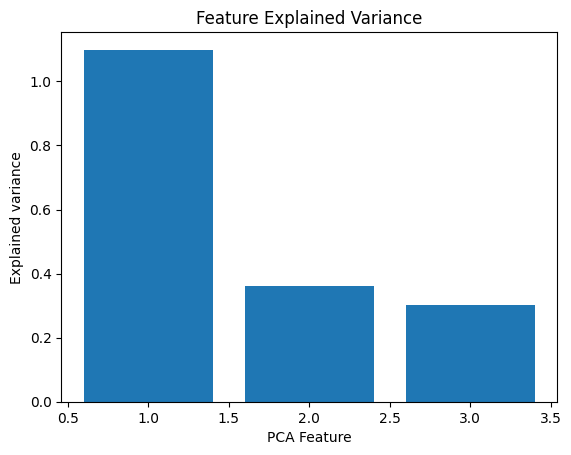

In [ ]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [ ]:

# import the PCA module from sklearn.decomposition
from sklearn.decomposition import PCA

# create a PCA object that will reduce to 2 components
pca = PCA(n_components=2)

# fit and transform the data using pca
#dfNumerical_pca = pca.fit_transform(numerical_data_data_frame)
#new_df = pd.DataFrame(dfNumerical_pca, columns=['PC1', 'PC2'])

df_pca = pca.fit_transform(df.drop(['HeartDisease'], axis=1))
new_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


# add the labels back to the iris dataframe

# new_df["Sex"]=df["Sex"]
# new_df["ChestPainType"]=df["ChestPainType"]
# new_df["RestingECG"]=df["RestingECG"]
# new_df["ExerciseAngina"]=df["ExerciseAngina"]
# new_df["ST_Slope"]=df["ST_Slope"]
new_df['HeartDisease'] = labels


new_df.head()

PC1       PC2  HeartDisease
0  1.722324  0.373685             0
1  0.563500  0.154845             1
2  1.749648  0.094161             0
3  0.464035 -0.638699             1
4  0.198692  0.652551             0

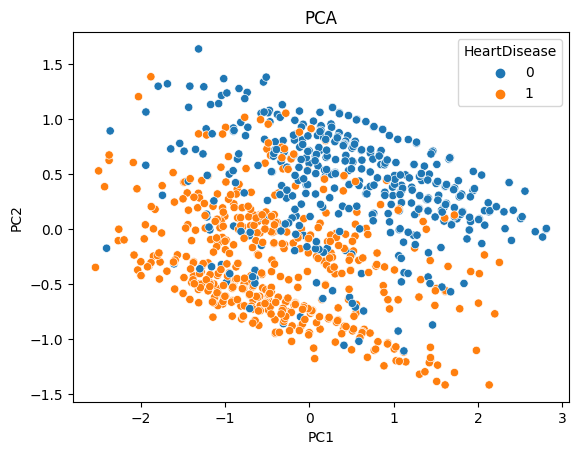

In [ ]:
# import plotly.express as px

# fig = px.scatter_3d(
#     df_pca, x=0, y=1, z=2, color=new_df['HeartDisease'] ,
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()

# fig = plt.figure(figsize=(7,5))
# ax = fig.add_subplot(111, projection='3d')
# marker = {0:'*',1:'o'}
# alpha = {0:.3, 1:.5}
# cdict = {0:'red',1:'green'}
# ax.scatter(new_df['PC1'],new_df['PC2'],new_df['PC3'],c=cdict[1],
#            label=new_df['HeartDisease'])
# ax.set_xlabel("First Principal Component", fontsize=14)
# ax.set_ylabel("Second Principal Component", fontsize=14)
# ax.set_zlabel("Third Principal Component", fontsize=14)


#plt.show()

sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease',data=new_df )
plt.title('PCA')
plt.show()

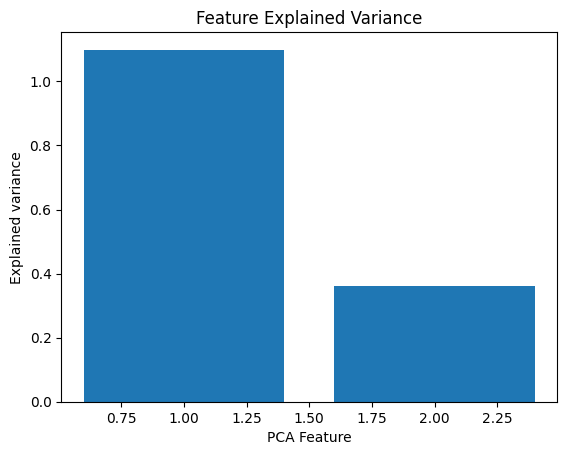

In [ ]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

###Clustering


#### After doing PCA Analysis

K-means:

Choosing optimal K for K-means (Optimal Number of clusters)

Elbow Mehtod

In [ ]:
pip install kmodes


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from pandas.plotting import scatter_matrix
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors

In [ ]:
input_to_k_means=new_df.drop(['HeartDisease'], axis=1)

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(input_to_k_means)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

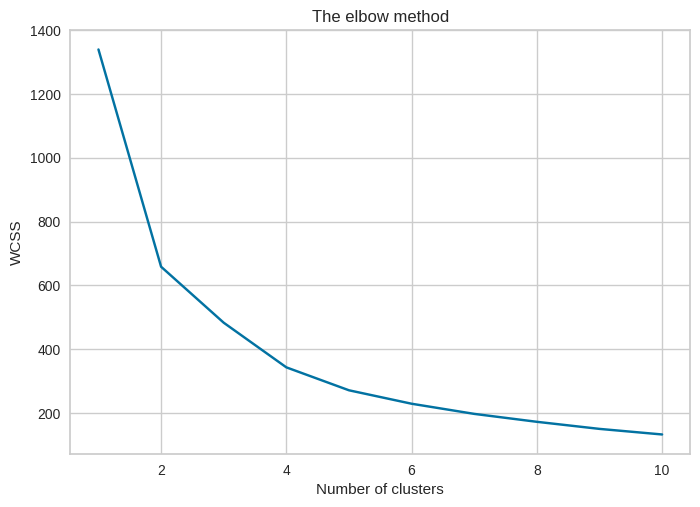

In [ ]:
#Visualizing ELbow Method

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

Silhouette Analysis

In [ ]:
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(input_to_k_means)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(input_to_k_means, cluster_labels))

Visualize Silhouette

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

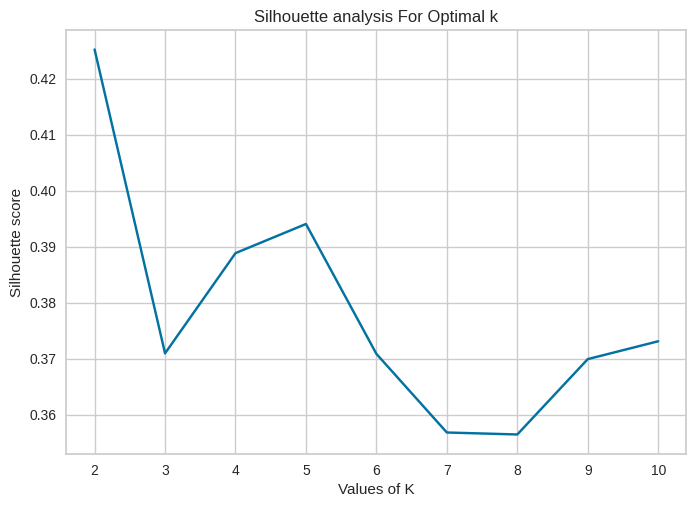

In [ ]:
plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

Visualize clusters along with Silhouette scores to decide between 2 or 3 clusters

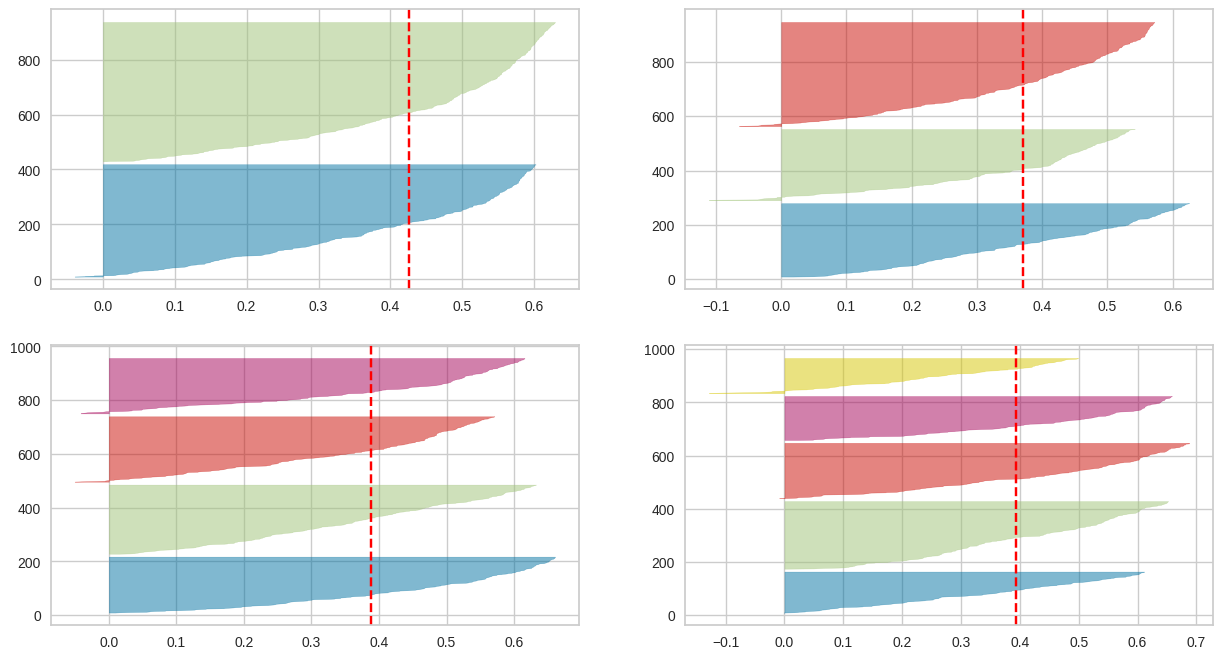

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2, 6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(input_to_k_means)

Computing DavisBouldin Index


In [ ]:
from sklearn.metrics import davies_bouldin_score
DavisB_Indices = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(input_to_k_means)
    cluster_labels = kmeans.labels_
    DavisB_Indices.append(davies_bouldin_score(input_to_k_means,cluster_labels))

Visualising DavisBouldin Index for each K (number of clusters)

Text(0, 0.5, 'Davies-Bouldin score')

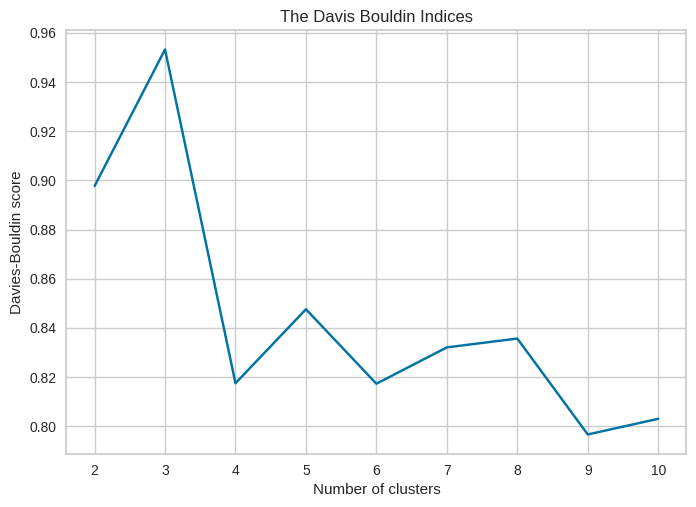

In [ ]:
#Visualizing Davis Bouldin

plt.plot(range(2, 11),DavisB_Indices , 'bx-')
plt.title('The Davis Bouldin Indices')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score') #within cluster sum of squares

In [ ]:
#Choosing K- to be 4
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(input_to_k_means)
clusters = km.labels_
score_Means = silhouette_score(input_to_k_means, km.labels_)   #why he re-calculates the silhouette score after getting number of clusters already ?
print('Silhouetter Score: %.3f' % score_Means)




Silhouetter Score: 0.389


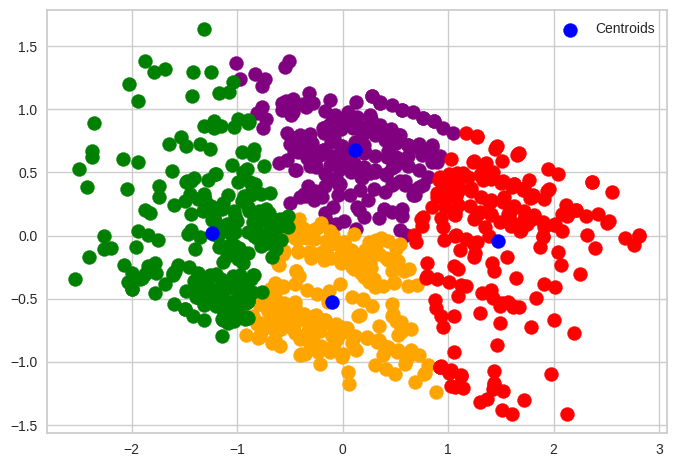

In [ ]:
plt.scatter(new_df.iloc[clusters == 0, 0], new_df.iloc[clusters == 0, 1], s = 100, c = 'purple')
plt.scatter(new_df.iloc[clusters == 1, 0], new_df.iloc[clusters == 1, 1], s = 100, c = 'orange')
plt.scatter(new_df.iloc[clusters == 2, 0], new_df.iloc[clusters == 2, 1], s = 100, c = 'green')
plt.scatter(new_df.iloc[clusters == 3, 0], new_df.iloc[clusters == 3, 1], s = 100, c = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.legend()

K-mediods:

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.7 MB/s eta 0:00:00


In [ ]:

from sklearn_extra.cluster import KMedoids

In [ ]:
input_to_k_medoids=new_df.drop(['HeartDisease'], axis=1)

In [ ]:
wcss = []

for i in range(1, 11):
    k_medoids = KMedoids(n_clusters=i, random_state=0)
    k_medoids.fit(input_to_k_medoids)
    wcss.append(k_medoids.inertia_)

Text(0, 0.5, 'WCSS')

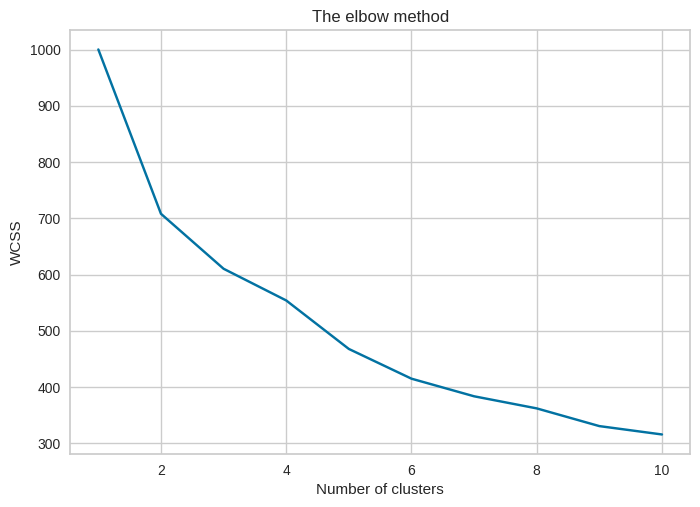

In [ ]:
#Visualizing ELbow Method

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

Silhouette Analysis

In [ ]:
avg_silhouette = []

for i in range(2, 11):
    k_medoids = KMedoids(n_clusters=i, random_state=0)
    k_medoids.fit(input_to_k_medoids)
    cluster_labels = k_medoids.labels_
    avg_silhouette.append(silhouette_score(input_to_k_medoids, cluster_labels))

Visualize Silhouette

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

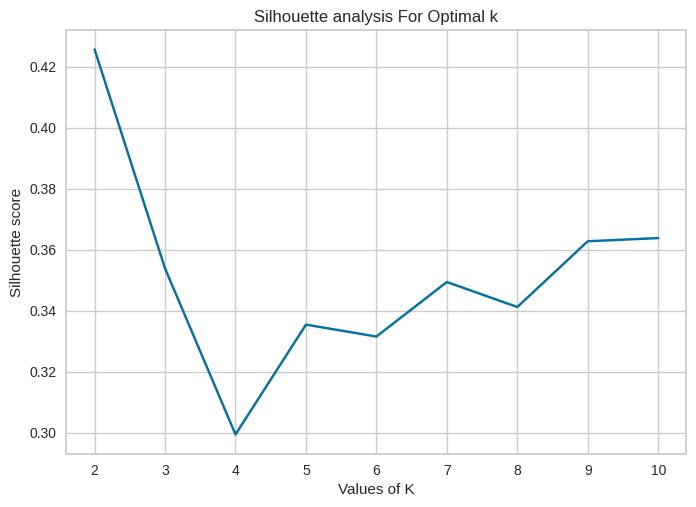

In [ ]:
plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

Visualiza clusters along with Silhouette scores to decide between 2 or 4 clusters

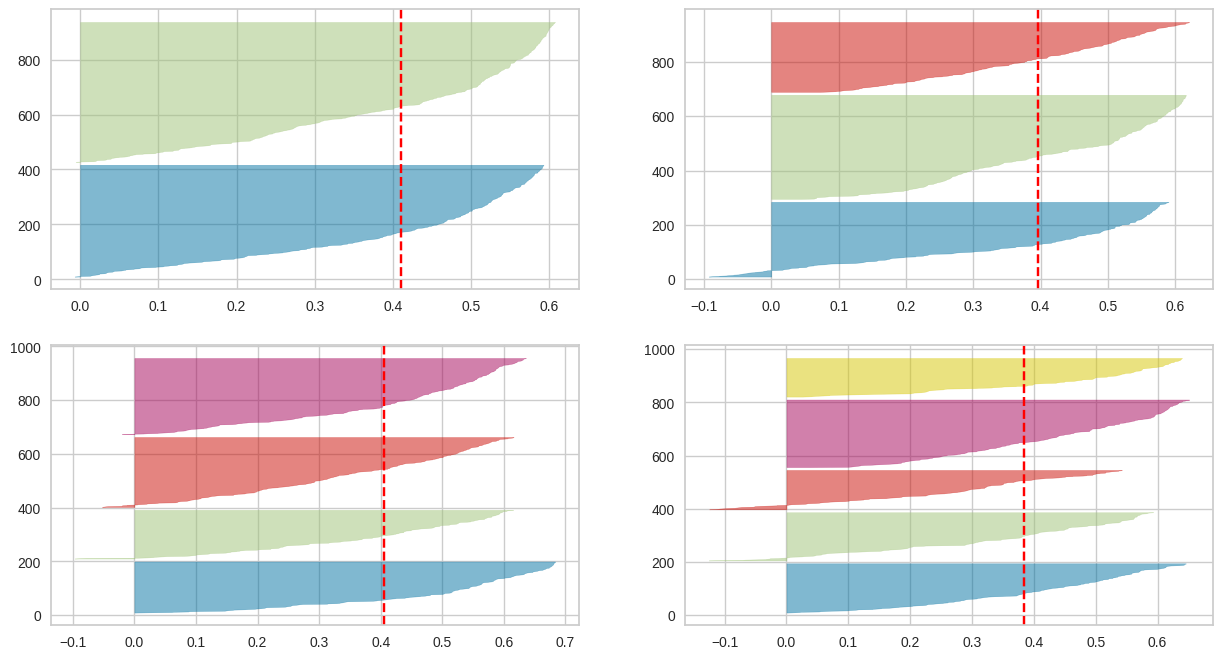

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2, 6):
    '''
    Create KMeans instance for different number of clusters
    '''
    k_medoids = KMedoids(n_clusters=i, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(k_medoids, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(input_to_k_medoids)

Computing DavisBouldin Index


In [ ]:
from sklearn.metrics import davies_bouldin_score
DavisB_Indices = []

for i in range(2, 11):
    k_medoids = KMedoids(n_clusters=i, random_state=0)
    k_medoids.fit(input_to_k_medoids)
    cluster_labels = k_medoids.labels_
    DavisB_Indices.append(davies_bouldin_score(input_to_k_medoids,cluster_labels))

Visualising DavisBouldin Index for each K (number of clusters)

Text(0, 0.5, 'Davies-Bouldin score')

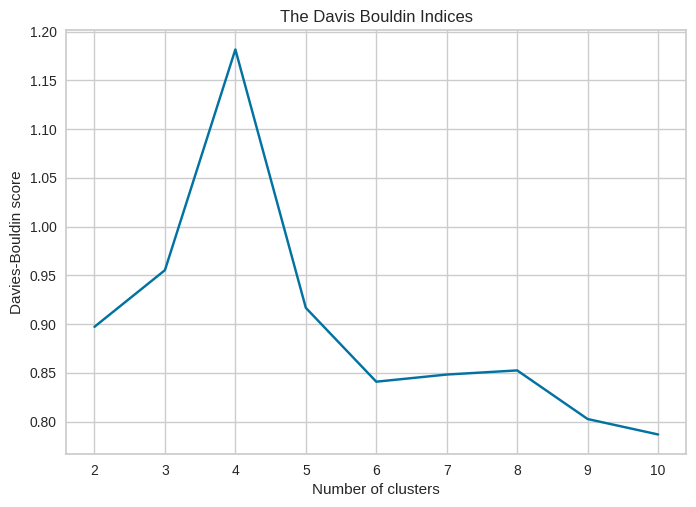

In [ ]:
#Visualizing Davis Bouldin

plt.plot(range(2, 11),DavisB_Indices , 'bx-')
plt.title('The Davis Bouldin Indices')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score') #within cluster sum of squares

In [ ]:
#Choosing K- to be 2
k_medoids = KMedoids(n_clusters=2, random_state=0)
k_medoids.fit(input_to_k_medoids)
clusters = k_medoids.labels_
score_Medoids = silhouette_score(input_to_k_medoids, k_medoids.labels_)   #why he re-calculates the silhouette score after getting number of clusters already ?
print('Silhouetter Score: %.3f' % score_Medoids)




Silhouetter Score: 0.426


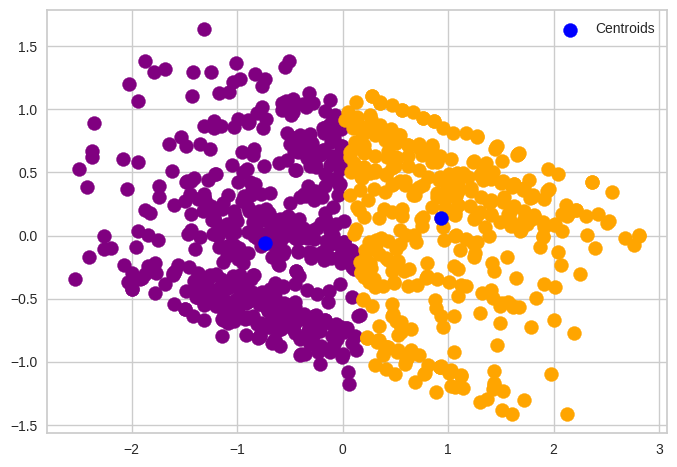

In [ ]:
plt.scatter(new_df.iloc[clusters == 0, 0], new_df.iloc[clusters == 0, 1], s = 100, c = 'purple')
plt.scatter(new_df.iloc[clusters == 1, 0], new_df.iloc[clusters == 1, 1], s = 100, c = 'orange')
plt.scatter(k_medoids.cluster_centers_[:, 0], k_medoids.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.legend()

 Hierarchical clustering

In [ ]:
input_to_AgglomerativeClustering=new_df.drop(['HeartDisease'], axis=1)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(input_to_AgglomerativeClustering)



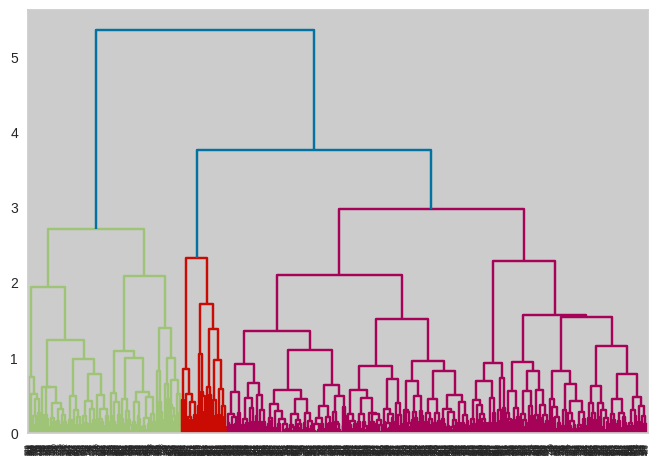

In [ ]:
dendrogram(linkage(new_df.drop(['HeartDisease'], axis=1), method="complete", metric="euclidean"))
plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

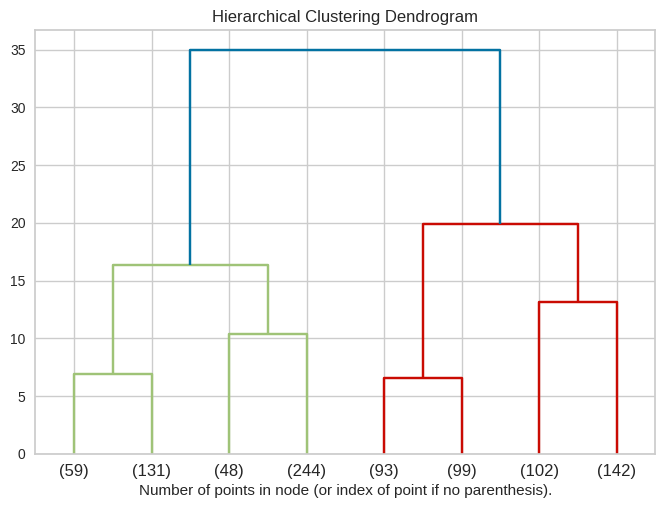

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
model2 = AgglomerativeClustering(distance_threshold=None, n_clusters=2)
model2 = model2.fit(input_to_AgglomerativeClustering)

Text(0, 0.5, 'PC 2')

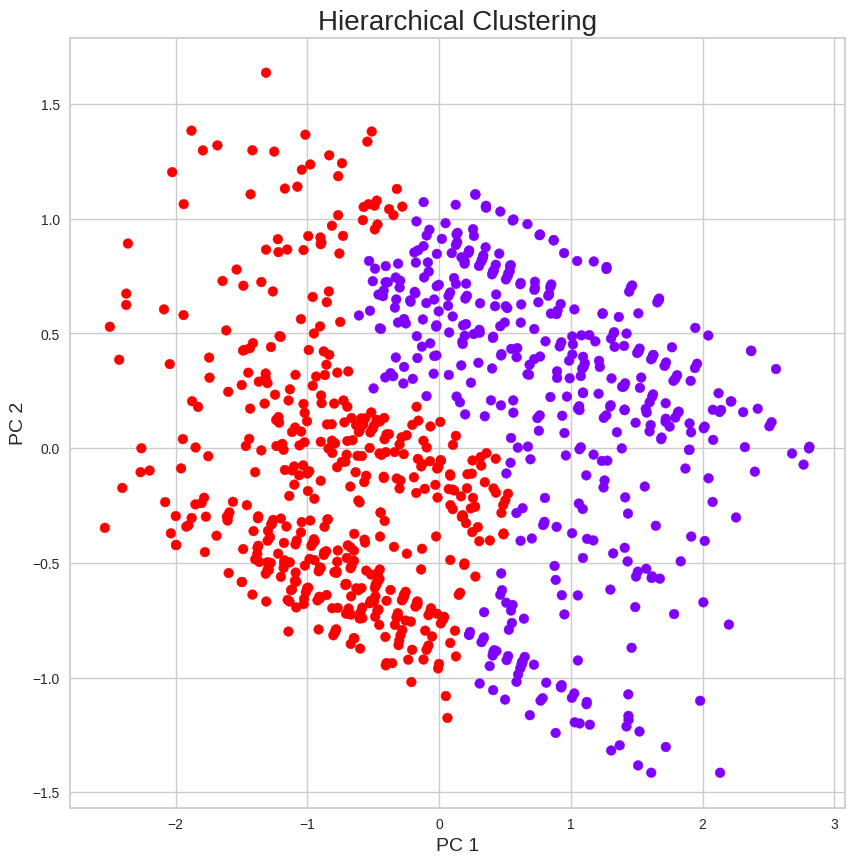

In [ ]:
import matplotlib
plt.figure(figsize=(10,10))
plt.scatter(new_df['PC1'],new_df['PC2'],c=model2.fit_predict(input_to_AgglomerativeClustering),cmap='rainbow')
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)

In [ ]:
score_Agg = silhouette_score(input_to_AgglomerativeClustering, model2.labels_)   #why he re-calculates the silhouette score after getting number of clusters already ?
print('Silhouetter Score: %.3f' % score_Agg)

Silhouetter Score: 0.380


###Classification Algorithms without applying PCA on input features (run on the standardized and normalized original features)

In [ ]:
#Preparing data for training and testing
from sklearn.model_selection import train_test_split
dataWithoutLabel = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split( dataWithoutLabel, y, test_size=0.3, random_state=7)

####Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)
predictions


array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

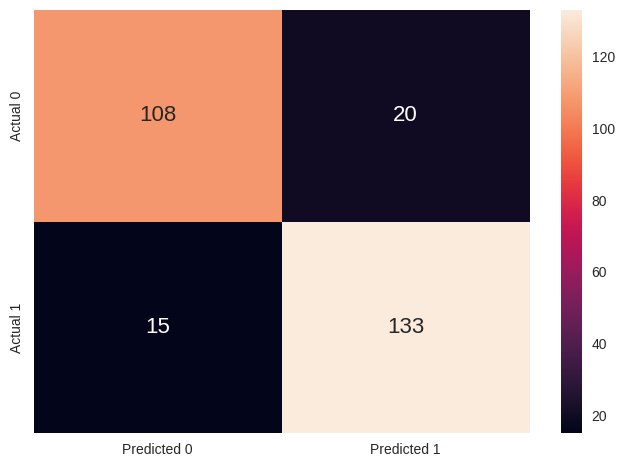

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
conf_mat_lr = confusion_matrix(y_test, predictions)

conf_frame = pd.DataFrame(conf_mat_lr , columns=['Predicted 0', 'Predicted 1'],
                        index=['Actual 0', 'Actual 1'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', lr_accuracy*100, '%')

Accuracy: 87.31884057971014 %


In [ ]:
from sklearn.metrics import precision_score


lr_precision = precision_score(y_test, predictions)
print('Percision:', lr_precision*100, '%')

Percision: 86.9281045751634 %


In [ ]:
from sklearn.metrics import recall_score


lr_recall = recall_score(y_test,predictions)
print('Recall:', lr_recall*100, '%')

Recall: 89.86486486486487 %


In [ ]:
from sklearn.metrics import f1_score


lr_f1 = f1_score(y_test,predictions)

print('F1 score:', lr_f1*100, '%')

F1 score: 88.37209302325581 %


ROC curve

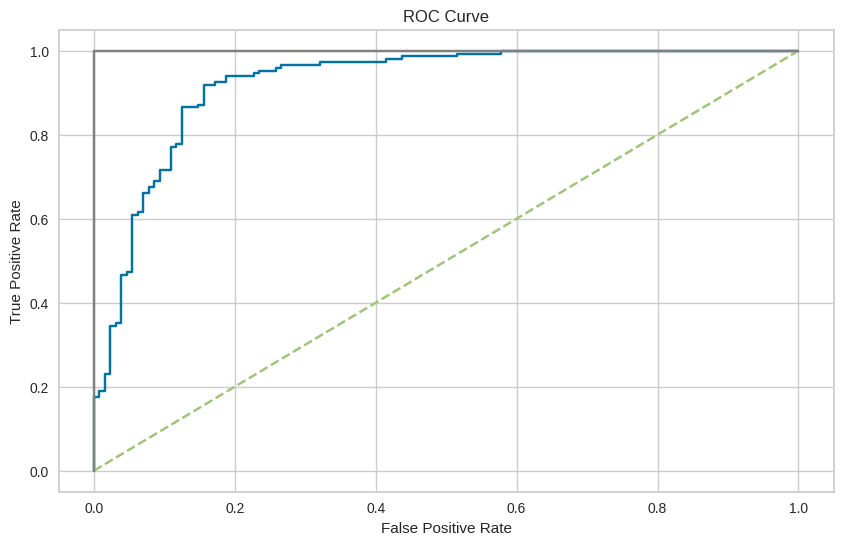

In [ ]:
from sklearn.metrics import roc_curve

# Get the predicted probabilities
y_pred_prob = log_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC value

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9239336993243243

####Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
predictions = nb_model.predict(X_test)

predictions

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

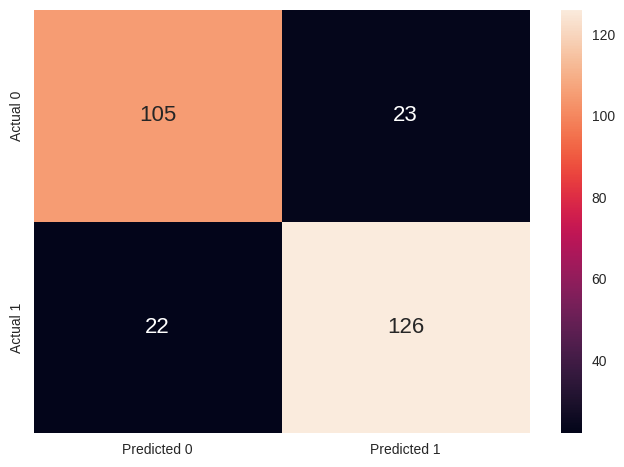

In [ ]:
conf_mat_nb = confusion_matrix(y_test, predictions)

conf_frame = pd.DataFrame(conf_mat_nb , columns=['Predicted 0', 'Predicted 1'],
                        index=['Actual 0', 'Actual 1'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
nb_accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', nb_accuracy*100, '%')

Accuracy: 83.69565217391305 %


In [ ]:
nb_precision = precision_score(y_test, predictions)
print('Percision:', nb_precision*100, '%')

Percision: 84.56375838926175 %


In [ ]:
nb_recall = recall_score(y_test,predictions)
print('Recall:', nb_recall*100, '%')

Recall: 85.13513513513513 %


In [ ]:
nb_f1 = f1_score(y_test,predictions)

print('F1 score:', nb_f1*100, '%')

F1 score: 84.84848484848484 %


ROC curve

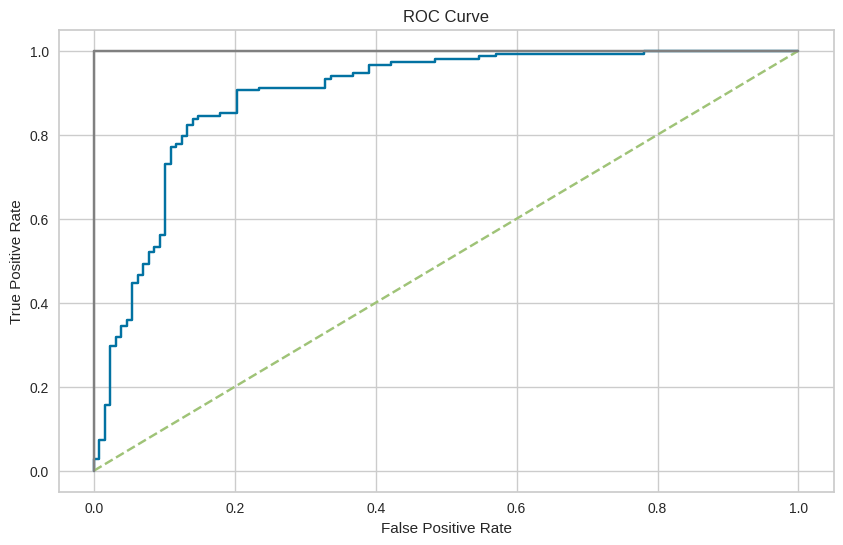

In [ ]:
from sklearn.metrics import roc_curve

# Get the predicted probabilities
y_pred_prob = nb_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC value

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.8954814189189189

####Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

predictions

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

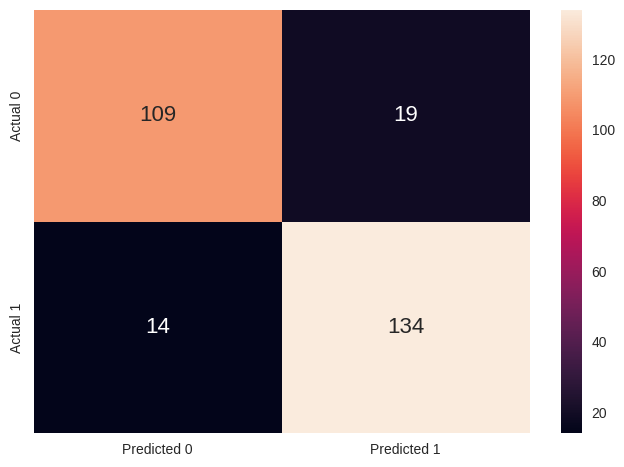

In [ ]:
conf_mat_rf = confusion_matrix(y_test, predictions)

conf_frame = pd.DataFrame(conf_mat_rf , columns=['Predicted 0', 'Predicted 1'],
                        index=['Actual 0', 'Actual 1'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
rf_accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', rf_accuracy*100, '%')

Accuracy: 88.04347826086956 %


In [ ]:
rf_precision = precision_score(y_test, predictions)
print('Percision:', rf_precision*100, '%')

Percision: 87.58169934640523 %


In [ ]:
rf_recall = recall_score(y_test,predictions)
print('Recall:', rf_recall*100, '%')

Recall: 90.54054054054053 %


In [ ]:
rf_f1 = f1_score(y_test,predictions)
print('F1 score:', rf_f1*100, '%')

F1 score: 89.03654485049834 %


ROC curve

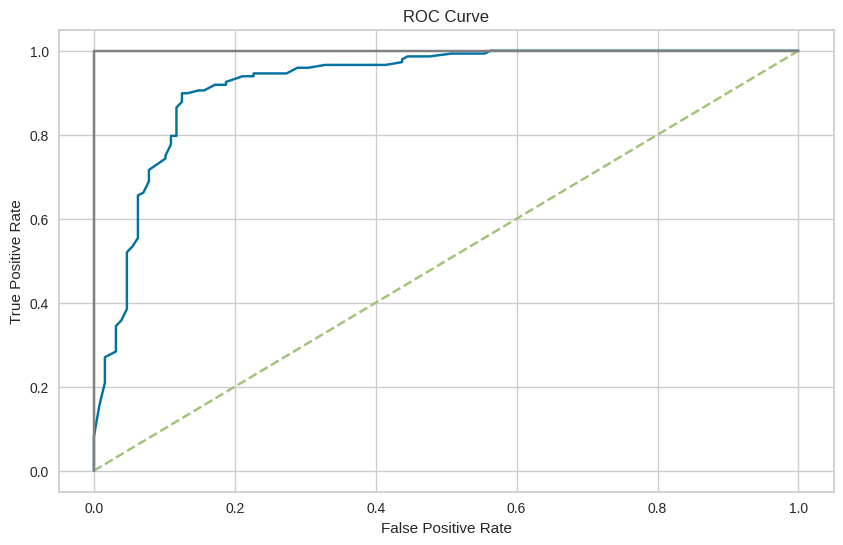

In [ ]:
from sklearn.metrics import roc_curve

# Get the predicted probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC value

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9243823902027026

###Classification Algorithms after applying PCA on input features##

In [ ]:
#Preparing data for training and testing
from sklearn.model_selection import train_test_split
df_final = new_df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split( df_final, y, test_size=0.3, random_state=7)

####Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
estimator=log_model.fit(X_train, y_train) ###
predictions = log_model.predict(X_test)
predictions


array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

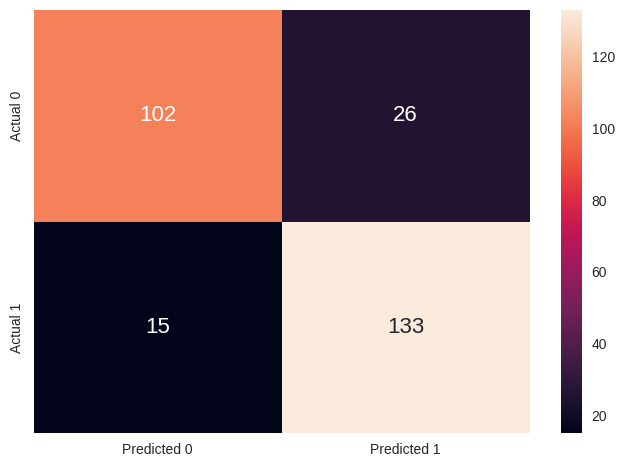

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
conf_mat_lr = confusion_matrix(y_test, predictions)

conf_frame = pd.DataFrame(conf_mat_lr , columns=['Predicted 0', 'Predicted 1'],
                        index=['Actual 0', 'Actual 1'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', lr_accuracy*100, '%')

Accuracy: 85.14492753623189 %


In [ ]:
from sklearn.metrics import precision_score


lr_precision = precision_score(y_test, predictions)
print('Percision:', lr_precision*100, '%')

Percision: 83.64779874213836 %


In [ ]:
from sklearn.metrics import recall_score


lr_recall = recall_score(y_test,predictions)
print('Recall:', lr_recall*100, '%')

Recall: 89.86486486486487 %


In [ ]:
from sklearn.metrics import f1_score


lr_f1 = f1_score(y_test,predictions)

print('F1 score:', lr_f1*100, '%')

F1 score: 86.64495114006515 %


ROC curve

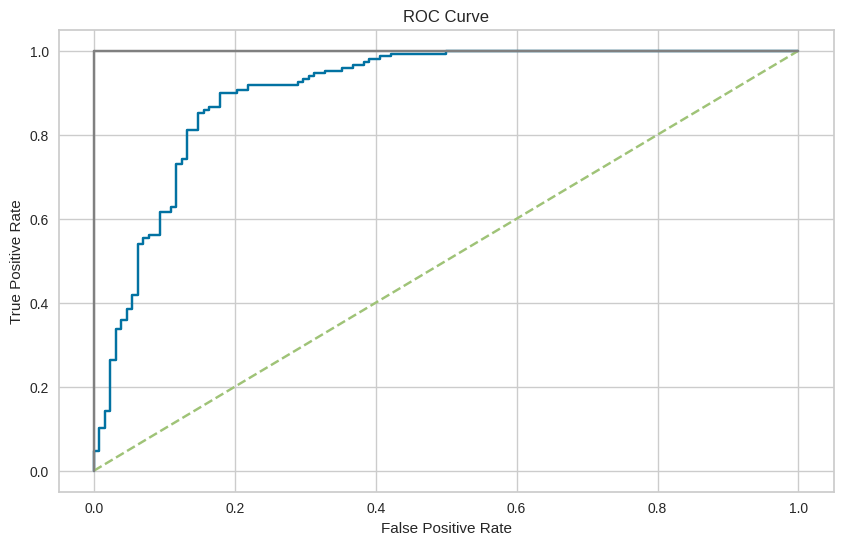

In [ ]:
from sklearn.metrics import roc_curve

# Get the predicted probabilities
y_pred_prob = log_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC value

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9037162162162162

Visualization of decision boundary

In [ ]:
y_train.value_counts()[0]

282

In [ ]:
y_train.value_counts()[1]

360

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

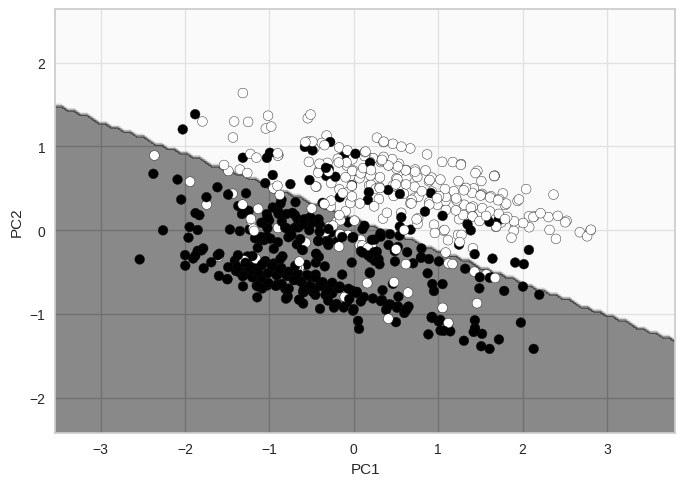

In [ ]:
#for training data
X=X_train
disp= DecisionBoundaryDisplay.from_estimator(estimator,X,response_method="predict",xlabel="PC1",ylabel="PC2",alpha=0.5)
disp.ax_.scatter(X_train['PC1'],X_train['PC2'],c=y_train,edgecolors='k')

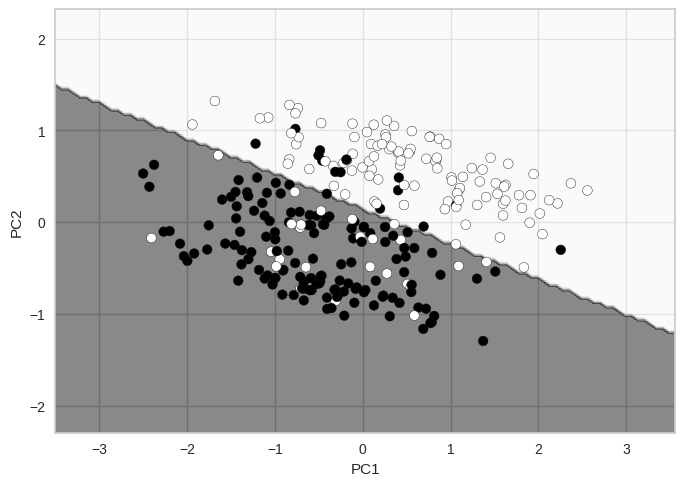

In [ ]:
#for testing data
X=X_test
disp= DecisionBoundaryDisplay.from_estimator(estimator,X,response_method="predict",xlabel="PC1",ylabel="PC2",alpha=0.5)
disp.ax_.scatter(X_test['PC1'],X_test['PC2'],c=y_test,edgecolors='k')

####Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()

estimator_nb=nb_model.fit(X_train, y_train)
predictions = nb_model.predict(X_test)

predictions

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

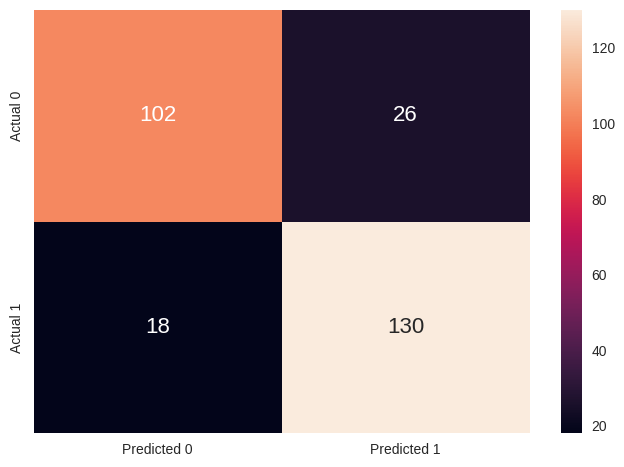

In [ ]:
conf_mat_nb = confusion_matrix(y_test, predictions)

conf_frame = pd.DataFrame(conf_mat_nb , columns=['Predicted 0', 'Predicted 1'],
                        index=['Actual 0', 'Actual 1'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
nb_accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', nb_accuracy*100, '%')

Accuracy: 84.05797101449275 %


In [ ]:
nb_precision = precision_score(y_test, predictions)
print('Percision:', nb_precision*100, '%')

Percision: 83.33333333333334 %


In [ ]:
nb_recall = recall_score(y_test,predictions)
print('Recall:', nb_recall*100, '%')

Recall: 87.83783783783784 %


In [ ]:
nb_f1 = f1_score(y_test,predictions)

print('F1 score:', nb_f1*100, '%')

F1 score: 85.5263157894737 %


ROC curve

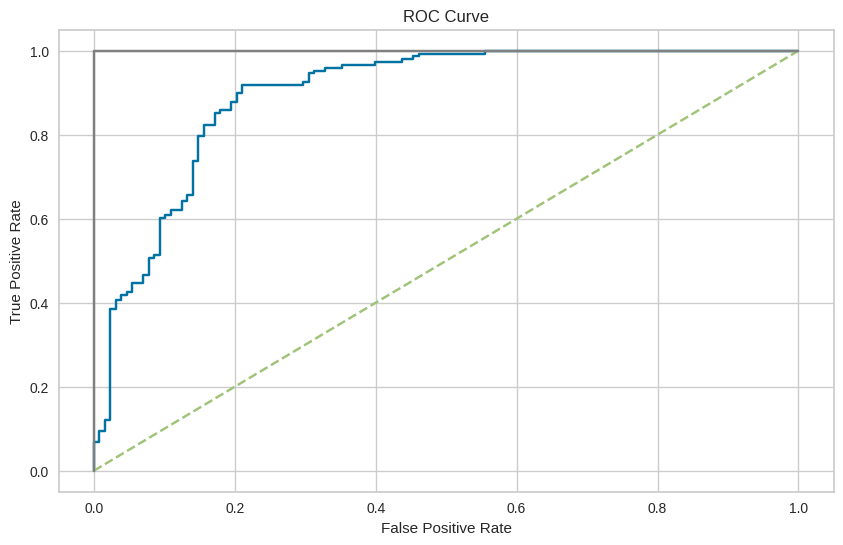

In [ ]:
from sklearn.metrics import roc_curve

# Get the predicted probabilities
y_pred_prob = nb_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC value

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.8973817567567567

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

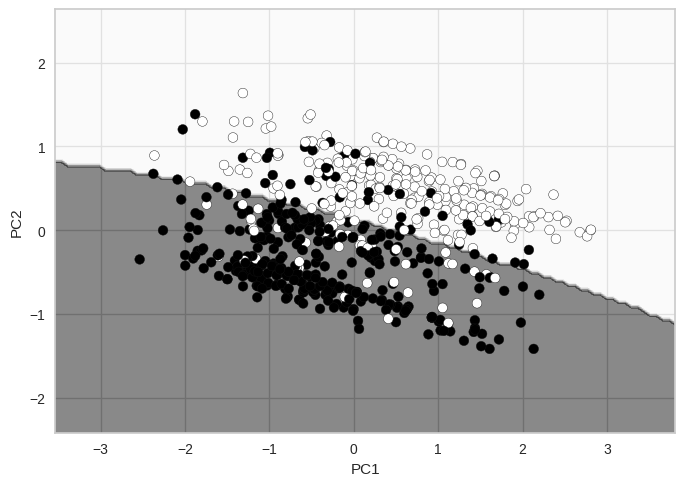

In [ ]:
X=X_train
disp= DecisionBoundaryDisplay.from_estimator(estimator_nb,X,response_method="predict",xlabel="PC1",ylabel="PC2",alpha=0.5)
disp.ax_.scatter(X_train['PC1'],X_train['PC2'],c=y_train,edgecolors='k')

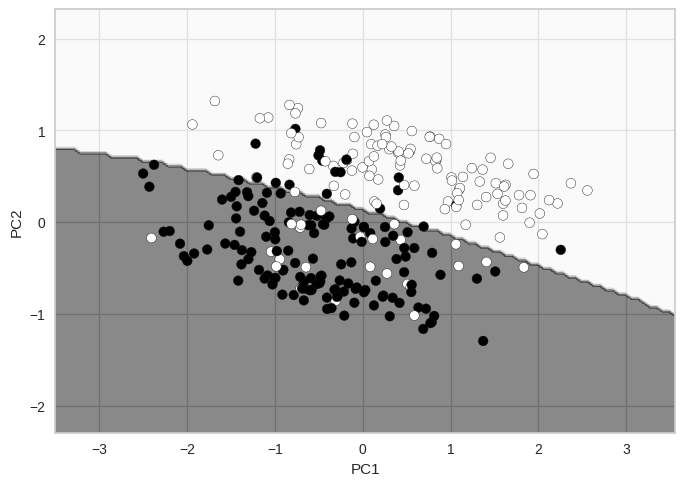

In [ ]:
X=X_test
disp= DecisionBoundaryDisplay.from_estimator(estimator_nb,X,response_method="predict",xlabel="PC1",ylabel="PC2",alpha=0.5)
disp.ax_.scatter(X_test['PC1'],X_test['PC2'],c=y_test,edgecolors='k')

####Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()

estimator_rf=rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

predictions

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

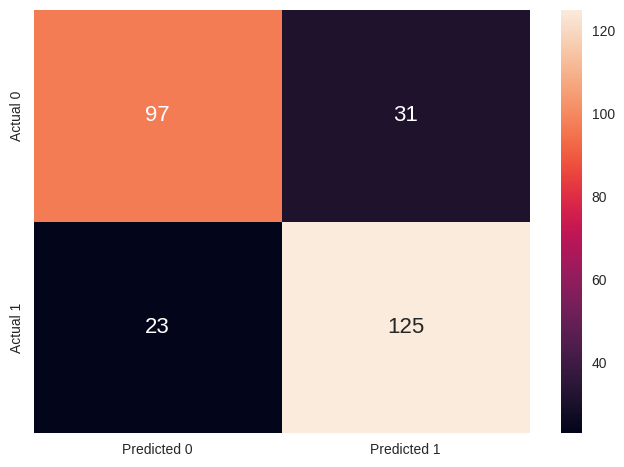

In [ ]:
conf_mat_rf = confusion_matrix(y_test, predictions)

conf_frame = pd.DataFrame(conf_mat_rf , columns=['Predicted 0', 'Predicted 1'],
                        index=['Actual 0', 'Actual 1'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
rf_accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', rf_accuracy*100, '%')

Accuracy: 80.43478260869566 %


In [ ]:
rf_precision = precision_score(y_test, predictions)
print('Percision:', rf_precision*100, '%')

Percision: 80.12820512820514 %


In [ ]:
rf_recall = recall_score(y_test,predictions)
print('Recall:', rf_recall*100, '%')

Recall: 84.45945945945947 %


In [ ]:
rf_f1 = f1_score(y_test,predictions)
print('F1 score:', rf_f1*100, '%')

F1 score: 82.23684210526318 %


ROC curve

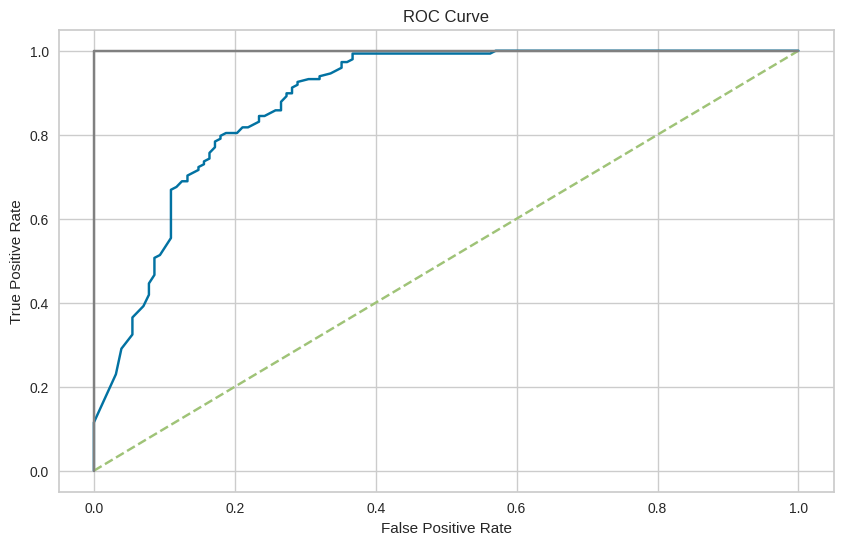

In [ ]:
from sklearn.metrics import roc_curve

# Get the predicted probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC value

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.8853198902027026

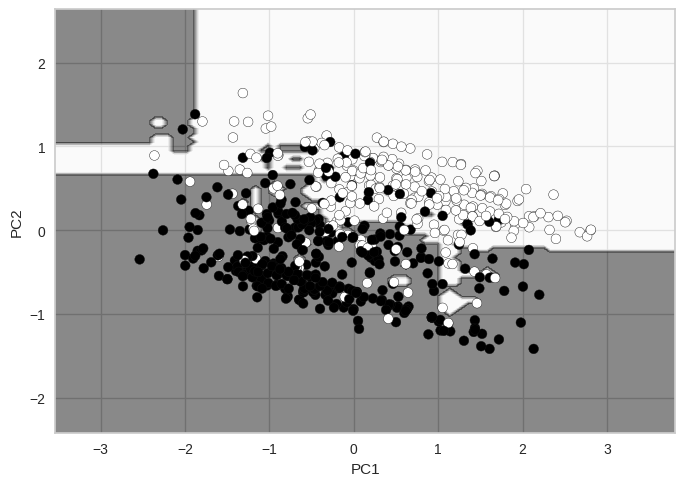

In [ ]:
X=X_train
disp= DecisionBoundaryDisplay.from_estimator(estimator_rf,X,response_method="predict",xlabel="PC1",ylabel="PC2",alpha=0.5)
disp.ax_.scatter(X_train['PC1'],X_train['PC2'],c=y_train,edgecolors='k')

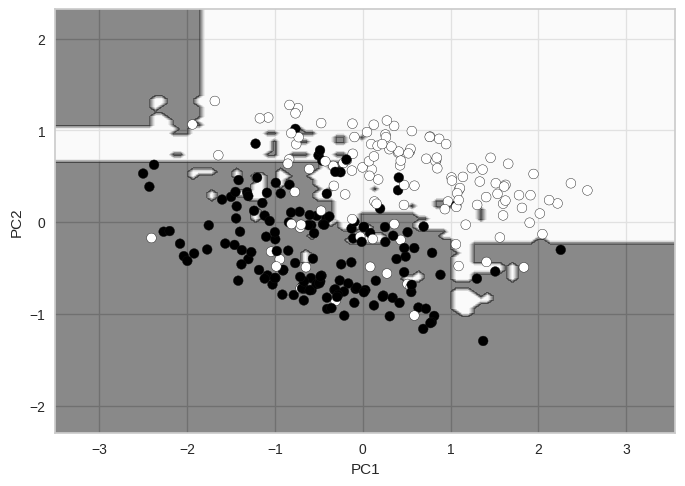

In [ ]:
X=X_test
disp= DecisionBoundaryDisplay.from_estimator(estimator_rf,X,response_method="predict",xlabel="PC1",ylabel="PC2",alpha=0.5)
disp.ax_.scatter(X_test['PC1'],X_test['PC2'],c=y_test,edgecolors='k')

##Results

### Comparing different Clustering Algorithms (After PCA)

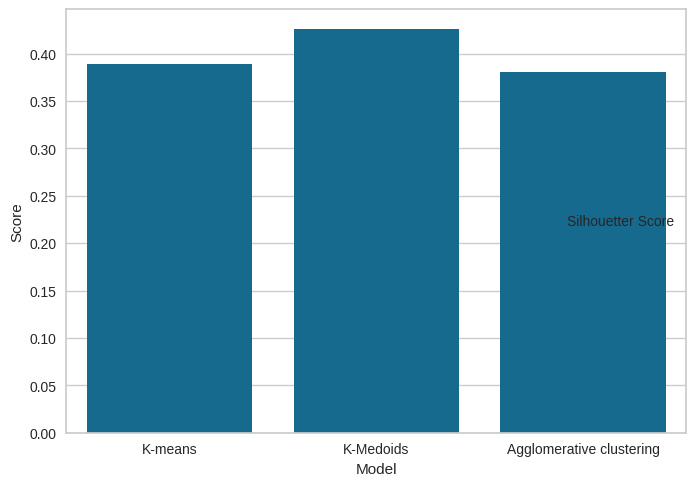

In [ ]:
metrics_df = pd.DataFrame({ 'Model' : ['K-means', 'K-Medoids', 'Agglomerative clustering'],
                            'Metric' : ['Silhouetter Score', 'Silhouetter Score', 'Silhouetter Score'],
                            'Score' : [score_Means, score_Medoids, score_Agg]})

sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
plt.legend(loc='center right')
plt.show()

The **K-medoids** model has achieved the highest Silhouette score (0.426) with 2 clusters. This is follwed by **K-means** algorithm (0.389 Silhouette score) with 4 clusters Finally is the **Agglomerative** **clustering** with 2 clusters (0.380 Silhouette score )

###Comparing different Classification Algorithm (Before PCA)

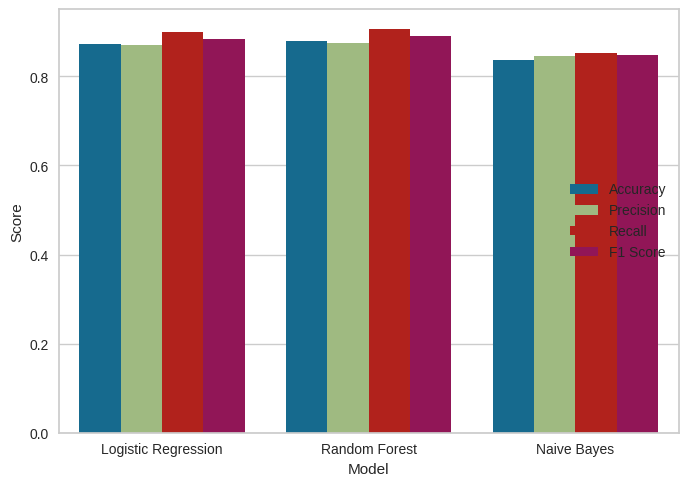

In [ ]:

metrics_df = pd.DataFrame({ 'Model' : ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
                            'Metric' : ['Accuracy', 'Accuracy', 'Accuracy', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1 Score', 'F1 Score', 'F1 Score'],
                            'Score' : [lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1]})

sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
plt.legend(loc='center right')
plt.show()

### Comparing different Classification Algorithm (After PCA)

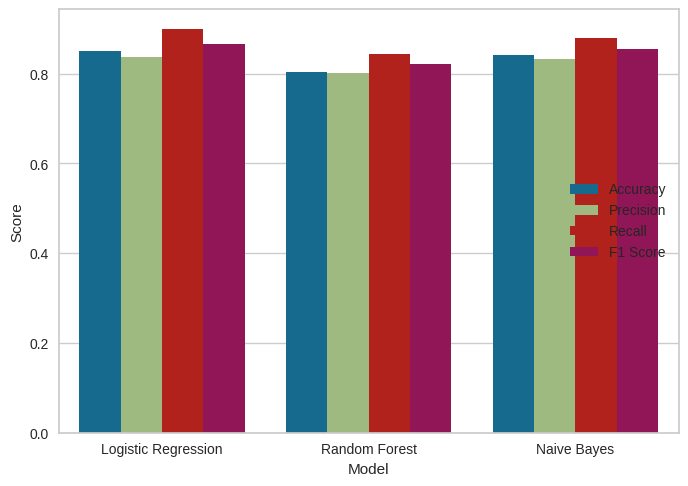

In [ ]:
metrics_df = pd.DataFrame({ 'Model' : ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
                            'Metric' : ['Accuracy', 'Accuracy', 'Accuracy', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1 Score', 'F1 Score', 'F1 Score'],
                            'Score' : [lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1]})

sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
plt.legend(loc='center right')
plt.show()

###How the PCA affected our Classification Results :

For the **Logistic Regression model**, using the 2 principal components as input features for training the model instead of using all data original features has lowered the model performance in terms of the evaluation metrics.

For the **Naive Bayes** , in general, using the 2 principal componenets as input features for training the model instead of using all data original features has improved the model performance slightly in terms of the evaluation metrics.


For the **Random Forest**: It was the model that has achieved the highest evaluation metrics when trained with the data original features.Nevertheless,it has achieved the worst evaluation metrics when using 2 principal components for training.

**The Random Forest (after PCA)** was **the worst** obtained model overall.

**The Random Forest (before PCA)** was **the best** obtained model overall.


##REFERENCES:

1-Labs

2-https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

3-https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

4-https://medium.com/analytics-vidhya/decision-boundary-for-classifiers-an-introduction-cc67c6d3da0e#:~:text=Decision%20Boundary%20can%20be%20visualized,an%20array%20of%20y%20values

5-https://www.jcchouinard.com/pca-explained-variance/

6-https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator